# Lending Club Case Study

### Submitted by:-
##### Group Members: 
1. Amay Trivedi
2. Koustav Chakraborty


#### Assignment Brief:
    
We work for a consumer finance company which specializes in lending loans to various people. Two types of risks are involved in this case

1. If the applicant is likely to repay the loan, the bank should approve the loan else it will be a loss for bank.

2. If the applicant is not likely to repay the loan, the bank should not approve the loan and these type of people are known as "Default". If the loan is approved then it may become finanical loss for the bank.

We are provided with information of past loan applicants and whether they defaulted or not.

#### Objective: 
The objective is to identify patterns which indicate that the person is likely to defaults which maybe used to take actions such as denying the loan, reducing the amount of loan, lending loan at a higher interest rate etc.

Dataset Involved: Loan Dataset

Goal in brief: The company can utilise this information for portfolio and risk assessment.

#### Let's begin with loading dataset and get some information about our variables...

In [1]:
%cd /Users/amaytrivedi/Downloads/

/Users/amaytrivedi/Downloads


In [2]:
# Import libraries which we usually require 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loan_dataset = pd.read_csv('loan.csv')
loan_dataset.head(5)
loan_dataset.shape

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(39717, 111)

In [4]:
columns_list = list(loan_dataset.columns)

In [5]:
loan_dataset.shape

(39717, 111)

In [6]:
columns_list

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Id, member id are unwanted columns, url, zip code, addr state, emp_title. Also, we will be taking loan_amnt so we can discard funded_amnt and funded_inv column

In [7]:
# Id, member id are unwanted columns, url, zip code, addr state, emp_title. Also, we willbe taking loan_amnt so we can discard funded_amnt and funded_inv column

loan_dataset = loan_dataset.drop('id', axis=1)
loan_dataset = loan_dataset.drop('url', axis=1)
loan_dataset = loan_dataset.drop('zip_code', axis=1)
#loan_dataset = loan_dataset.drop('addr_state', axis=1)
columns_tobe_dropped = ['member_id','pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',
                       'funded_amnt', 'funded_amnt_inv']
loan_dataset= loan_dataset.drop(columns_tobe_dropped,axis=1)
loan_dataset.shape

(39717, 99)

In [8]:
def check_null(df):
    return df.isnull().sum()

In [9]:
check_null(loan_dataset)

loan_amnt                             0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
desc                              12940
purpose                               0
title                                11
addr_state                            0
dti                                   0
delinq_2yrs                           0
earliest_cr_line                      0
inq_last_6mths                        0
mths_since_last_delinq            25682
mths_since_last_record            36931
open_acc                              0
pub_rec                               0


In [10]:
def check_missing_value_percentage(dataset):
    return 100 * round(check_null(dataset)/len(dataset.index))

In [11]:
cols = loan_dataset.columns[loan_dataset.isnull().mean()>=0.5]

In [12]:
len(cols)

57

In [13]:
loan_dataset = loan_dataset.drop(cols, axis = 1)

In [14]:
loan_dataset.shape

(39717, 42)

In [15]:
check_missing_value_percentage(loan_dataset)
len(loan_dataset.columns)

42

#### Conclusion: After doing some cleaning process we have reduced our column size from 107 to 50.

In [16]:
loan_dataset.shape

(39717, 42)

In [17]:
loan_dataset.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


In [18]:
100*(len(loan_dataset[loan_dataset.isnull().sum(axis=1) > 5].index) / len(loan_dataset.index))

0.0050356270614598285

In [19]:
loan_dataset.shape

(39717, 42)

In [20]:
loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [21]:
loan_dataset.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Conclusion: We get our Charged Off counts as 5627, these are the number of defaulters in our loan dataset

Also, this problem is imbalanced as we have differences in Charged Off number w.r.t Fully Paid and Current

In [22]:
loan_dataset.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [23]:
check_null(loan_dataset)

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
desc                          12940
purpose                           0
title                            11
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
out_prncp                         0
out_prncp_inv               

 Let's check some of our columns like desc which is Loan description

#### Conclusion: We can see that top and bottom left end, right have higher correlation compared to the ones in middle`m

In [24]:
pd.options.display.float_format = '{:.3f}'.format
loan_dataset.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,...,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39661.000,39661.000,39020.000,39678.000
mean,11219.444,324.562,68968.926,13.315,0.147,0.869,9.294,0.055,13382.528,22.089,...,9793.349,2263.663,1.363,95.222,12.406,2678.826,0.000,0.000,0.043,0.000
std,7456.671,208.875,63793.766,6.679,0.492,1.070,4.400,0.237,15885.017,11.402,...,7065.522,2608.112,7.290,688.745,148.672,4447.136,0.000,0.000,0.204,0.000
min,500.000,15.690,4000.000,0.000,0.000,0.000,2.000,0.000,0.000,2.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5500.000,167.020,40404.000,8.170,0.000,0.000,6.000,0.000,3703.000,13.000,...,4600.000,662.180,0.000,0.000,0.000,218.680,0.000,0.000,0.000,0.000
50%,10000.000,280.220,59000.000,13.400,0.000,1.000,9.000,0.000,8850.000,20.000,...,8000.000,1348.910,0.000,0.000,0.000,546.140,0.000,0.000,0.000,0.000
75%,15000.000,430.780,82300.000,18.600,0.000,1.000,12.000,0.000,17058.000,29.000,...,13653.260,2833.400,0.000,0.000,0.000,3293.160,0.000,0.000,0.000,0.000
max,35000.000,1305.190,6000000.000,29.990,11.000,8.000,44.000,4.000,149588.000,90.000,...,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,0.000,0.000,2.000,0.000


In [25]:
# Let's remove the desc column
loan_dataset = loan_dataset.drop('desc', axis=1)

In [26]:
check_null(loan_dataset)

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
title                           11
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv     

In [27]:
loan_dataset['emp_title'] = loan_dataset.emp_title.str.lower()

In [28]:
loan_dataset.emp_title.value_counts()

us army                                     210
bank of america                             137
walmart                                      81
at&t                                         79
kaiser permanente                            69
ibm                                          68
wells fargo                                  67
verizon wireless                             64
ups                                          63
self                                         60
usps                                         57
us air force                                 57
self employed                                57
usaf                                         56
walgreens                                    53
lockheed martin                              49
state of california                          48
us navy                                      47
home depot                                   47
united states air force                      45
us postal service                       

In [29]:
loan_dataset.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [30]:
loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [31]:
loan_dataset.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [32]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
loan_amnt                     39717 non-null int64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
purpose                       39717 non-null object
title                         39706 non-null object
addr_state                    39717 non-null object
dti                           39717 non-null float64
delin

In [33]:
loan_dataset=loan_dataset[~loan_dataset.pub_rec_bankruptcies.isnull()]
loan_dataset=loan_dataset[~loan_dataset.emp_title.isnull()]
check_null(loan_dataset)

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                    56
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                          9
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    46
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_

In [34]:
loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### We would like to analyze the risk involved in lending a loan. Therefore, emp title are not necessary for our usecase.

In [35]:
# remove_cols = ['emp_title']

# loan_dataset = loan_dataset.drop(remove_cols, axis=1)

loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [36]:
loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [37]:
loan_dataset.dti.value_counts()

0.000     152
12.000     43
19.200     38
18.000     38
12.480     37
13.200     36
16.800     36
13.500     34
14.290     34
17.040     33
21.600     32
10.640     32
15.000     31
14.440     31
20.400     31
4.800      30
6.000      30
11.500     30
12.860     30
6.760      30
15.310     29
12.690     29
15.630     29
16.770     29
14.970     29
8.880      29
9.600      29
22.430     28
11.040     28
16.320     28
         ... 
27.100      1
26.910      1
26.480      1
27.820      1
28.880      1
27.290      1
29.110      1
27.350      1
27.170      1
28.640      1
29.010      1
29.610      1
29.080      1
29.890      1
28.080      1
0.190       1
29.130      1
26.020      1
29.560      1
26.270      1
29.200      1
27.370      1
27.620      1
27.710      1
28.800      1
27.690      1
28.250      1
27.470      1
29.720      1
27.210      1
Name: dti, Length: 2857, dtype: int64

In [38]:
loan_dataset.pub_rec_bankruptcies.value_counts()

0.000    35090
1.000     1507
2.000        7
Name: pub_rec_bankruptcies, dtype: int64

In [39]:
missing = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)), 2) 
missing[missing != 0.0]

emp_length                   0.150
title                        0.020
revol_util                   0.130
last_pymnt_d                 0.170
collections_12_mths_ex_med   0.010
chargeoff_within_12_mths     0.010
dtype: float64

In [40]:
len(loan_dataset.last_credit_pull_d)

36604

1. title           0.02
2. revol_util      0.13
3. last_pymnt_d    0.18

In [41]:
missing = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)), 2) 
missing[missing != 0]

emp_length                   0.150
title                        0.020
revol_util                   0.130
last_pymnt_d                 0.170
collections_12_mths_ex_med   0.010
chargeoff_within_12_mths     0.010
dtype: float64

In [42]:
loan_dataset=loan_dataset[~loan_dataset.isnull()]
loan_dataset=loan_dataset[~loan_dataset.emp_length.isnull()]
loan_dataset.shape

(36548, 41)

In [43]:
missing = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)), 2) 
missing[missing != 0]

title                        0.020
revol_util                   0.130
last_pymnt_d                 0.180
collections_12_mths_ex_med   0.010
chargeoff_within_12_mths     0.010
dtype: float64

#### Conclusion: We are left with 4 columns non zero columns revol_util, last_pyment_d, last_cedit_pull_d, pub_rec_bankruptcies

In [44]:
loan_dataset=loan_dataset[~loan_dataset.title.isnull()]
loan_dataset=loan_dataset[~loan_dataset.revol_util.isnull()]
loan_dataset=loan_dataset[~loan_dataset.last_pymnt_d.isnull()]
loan_dataset=loan_dataset[~loan_dataset.last_credit_pull_d.isnull()]
loan_dataset=loan_dataset[~loan_dataset.pub_rec_bankruptcies.isnull()]


In [45]:
missing = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)), 2) 
missing[missing != 0]

collections_12_mths_ex_med   0.010
chargeoff_within_12_mths     0.010
dtype: float64

In [46]:
loan_dataset.shape

(36433, 41)

In [47]:
loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [49]:
# imp_cols, len(imp_cols)

In [50]:
print(loan_dataset.collections_12_mths_ex_med.unique())
print(loan_dataset.chargeoff_within_12_mths.unique())

[  0.  nan]
[  0.  nan]


#### Conclusion: It can be clearly seen that the columns 'collections_12_mths_ex_med' and 'chargeoff_within_12_mths' have only 2 values 0 and nan which is not useful for our analysis and thus we can remove it

In [51]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan_dataset = loan_dataset.drop(drop_columnlist, axis = 1)

In [52]:
check_null(loan_dataset)

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

In [53]:
loan_dataset.shape

(36433, 38)

In [54]:
loan_dataset.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39551,12375,36 months,10.91%,404.620,C,C3,fullmoon software,2 years,RENT,80000.000,...,1161.290,12375.000,1995.920,0.000,0.000,0.000,Feb-10,4259.110,May-14,1.000
39562,4800,36 months,10.28%,155.520,C,C1,e.e. wine inc,1 year,RENT,35000.000,...,1176.560,4800.000,334.090,0.000,0.000,0.000,Aug-08,3891.080,Aug-08,1.000
39623,9000,36 months,12.49%,301.040,D,D3,maximus,8 years,MORTGAGE,39000.000,...,311.640,1496.830,609.260,0.000,1909.870,668.360,May-08,301.050,May-16,1.000
39666,15450,36 months,11.22%,507.460,C,C4,arin,2 years,MORTGAGE,40000.000,...,451.730,8688.590,2659.960,0.000,304.200,3.090,Oct-09,1016.150,Mar-10,1.000
39680,3000,36 months,11.86%,99.440,D,D1,fairfield manufacturing,2 years,MORTGAGE,36153.000,...,626.440,3000.000,579.660,0.000,0.000,0.000,Aug-10,101.510,Jul-10,1.000


In [55]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
loan_amnt                  36433 non-null int64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null object
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
purpose                    36433 non-null object
title                      36433 non-null object
addr_state                 36433 non-null object
dti                        36433 non-null float64
delinq_2yrs                36433 non-null int64
earliest

Lets now see what values do we have in column type as Object by basically getting the value_counts or unique length of it.

In [56]:
loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Conclusion: We have 16 columns with dtype as object, we can see now value_counts of it.

In [57]:
print(loan_dataset.term.value_counts())

print("\n\n\n")
print(loan_dataset.grade.value_counts())
print("\n\n\n")
print(loan_dataset.emp_length.value_counts())
print("\n\n\n")
print(loan_dataset.home_ownership.value_counts())
print("\n\n\n")
print(loan_dataset.purpose.value_counts())
print("\n\n\n")
print(loan_dataset.title.value_counts())
print("\n\n\n")
print(loan_dataset.addr_state.value_counts())
print("\n\n\n")
print(loan_dataset.earliest_cr_line.value_counts())
print("\n\n\n")
print(loan_dataset.revol_util.value_counts())
print("\n\n\n")
print(loan_dataset.last_pymnt_d.value_counts())
print("\n\n\n")
print(loan_dataset.last_credit_pull_d.value_counts())
print("\n\n\n")


 36 months    26377
 60 months    10056
Name: term, dtype: int64




B    11035
A     9175
C     7431
D     4875
E     2650
F      969
G      298
Name: grade, dtype: int64




10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64




RENT        17464
MORTGAGE    16300
OWN          2575
OTHER          94
Name: home_ownership, dtype: int64




debt_consolidation    17470
credit_card            4726
other                  3575
home_improvement       2705
major_purchase         2008
car                    1443
small_business         1414
wedding                 886
medical                 634
moving                  529
house                   343
vacation                336
educational             276
renewable_energy         88
Name: purpose, dtype: int64




Debt Consolidation                                 2064


In [58]:
# Date Time columns - earliest_cr_line, last_pymnt_d, last_credit_pull_d
# Revol Util field - replace '%' anc convert to numerics
# Convert to str.lower() of title column in loan dataset.
loan_dataset=loan_dataset[~loan_dataset.emp_length.isnull()]


In [59]:
loan_dataset.title = loan_dataset.title.str.lower()
loan_dataset.revol_util = loan_dataset.revol_util.str.replace("%", "").astype(float)

In [60]:
loan_dataset.title.value_counts()

debt consolidation                          2901
debt consolidation loan                     1770
personal loan                                904
consolidation                                693
home improvement                             504
personal                                     494
credit card consolidation                    452
credit card loan                             333
consolidation loan                           330
loan                                         293
small business loan                          274
home improvement loan                        263
car loan                                     252
wedding loan                                 232
credit card payoff                           209
credit card refinance                        196
consolidate                                  195
wedding                                      180
other loan                                   176
my loan                                      166
credit card         

In [61]:
cleaned_loan_dataset = loan_dataset[:]

In [62]:
# cleaned_loan_dataset.issue_d = pd.to_datetime(cleaned_loan_dataset.issue_d, format='%b-%y')
cleaned_loan_dataset.earliest_cr_line = pd.to_datetime(cleaned_loan_dataset.earliest_cr_line, format='%b-%y')
cleaned_loan_dataset.last_pymnt_d = pd.to_datetime(cleaned_loan_dataset.last_pymnt_d, format='%b-%y')
cleaned_loan_dataset.last_credit_pull_d = pd.to_datetime(cleaned_loan_dataset.last_credit_pull_d, format='%b-%y')

In [63]:
cleaned_loan_dataset.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.830,C,C4,ryder,< 1 year,RENT,30000.000,...,1008.710,456.460,435.170,0.000,117.080,1.110,2013-04-01,119.660,2013-09-01,0.000
3,10000,36 months,13.49%,339.310,C,C1,air resources board,10+ years,RENT,49200.000,...,12231.890,10000.000,2214.920,16.970,0.000,0.000,2015-01-01,357.480,2016-04-01,0.000
4,3000,60 months,12.69%,67.790,B,B5,university medical group,1 year,RENT,80000.000,...,3513.330,2475.940,1037.390,0.000,0.000,0.000,2016-05-01,67.790,2016-05-01,0.000
5,5000,36 months,7.90%,156.460,A,A4,veolia transportaton,3 years,RENT,36000.000,...,5632.210,5000.000,632.210,0.000,0.000,0.000,2015-01-01,161.030,2016-01-01,0.000
6,7000,60 months,15.96%,170.080,C,C5,southern star photography,8 years,RENT,47004.000,...,10110.840,6985.610,3125.230,0.000,0.000,0.000,2016-05-01,1313.760,2016-05-01,0.000


In [64]:
cleaned_loan_dataset.shape

(36433, 38)

We can see that the emp length has structure like 10+ years whereas, in data dictionary file basically this field represents the years of experience. So, we can make an exemption for less than 1 year the value can be 0 and same holds true for 10+ years which will be considered as 10 respectively.

In [65]:
cleaned_loan_dataset.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [66]:
import re

def clean_employee_length(val):
    if '<' in val:
        val = '0'
    return int(re.search(r'\d+', val).group(0))

In [67]:
cleaned_loan_dataset.emp_length = cleaned_loan_dataset.emp_length.apply(lambda el: clean_employee_length(el))

In [68]:
cleaned_loan_dataset.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.830,C,C4,ryder,0,RENT,30000.000,...,1008.710,456.460,435.170,0.000,117.080,1.110,2013-04-01,119.660,2013-09-01,0.000
3,10000,36 months,13.49%,339.310,C,C1,air resources board,10,RENT,49200.000,...,12231.890,10000.000,2214.920,16.970,0.000,0.000,2015-01-01,357.480,2016-04-01,0.000
4,3000,60 months,12.69%,67.790,B,B5,university medical group,1,RENT,80000.000,...,3513.330,2475.940,1037.390,0.000,0.000,0.000,2016-05-01,67.790,2016-05-01,0.000
5,5000,36 months,7.90%,156.460,A,A4,veolia transportaton,3,RENT,36000.000,...,5632.210,5000.000,632.210,0.000,0.000,0.000,2015-01-01,161.030,2016-01-01,0.000
6,7000,60 months,15.96%,170.080,C,C5,southern star photography,8,RENT,47004.000,...,10110.840,6985.610,3125.230,0.000,0.000,0.000,2016-05-01,1313.760,2016-05-01,0.000


In [69]:
cleaned_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
loan_amnt                  36433 non-null int64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null int64
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
purpose                    36433 non-null object
title                      36433 non-null object
addr_state                 36433 non-null object
dti                        36433 non-null float64
delinq_2yrs                36433 non-null int64
earliest_

In [70]:
cleaned_loan_dataset.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

As from the value counts it can be seen we have only 'months' in term column.Therefore, we can clean it up with a small logic of removing months and converting it to int or float as per the requirement. In this case 'int'

In [71]:
cleaned_loan_dataset['term'] = cleaned_loan_dataset.term.apply(lambda x: x.split()[0])

In [72]:
cleaned_loan_dataset.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60,15.27%,59.830,C,C4,ryder,0,RENT,30000.000,...,1008.710,456.460,435.170,0.000,117.080,1.110,2013-04-01,119.660,2013-09-01,0.000
3,10000,36,13.49%,339.310,C,C1,air resources board,10,RENT,49200.000,...,12231.890,10000.000,2214.920,16.970,0.000,0.000,2015-01-01,357.480,2016-04-01,0.000
4,3000,60,12.69%,67.790,B,B5,university medical group,1,RENT,80000.000,...,3513.330,2475.940,1037.390,0.000,0.000,0.000,2016-05-01,67.790,2016-05-01,0.000
5,5000,36,7.90%,156.460,A,A4,veolia transportaton,3,RENT,36000.000,...,5632.210,5000.000,632.210,0.000,0.000,0.000,2015-01-01,161.030,2016-01-01,0.000
6,7000,60,15.96%,170.080,C,C5,southern star photography,8,RENT,47004.000,...,10110.840,6985.610,3125.230,0.000,0.000,0.000,2016-05-01,1313.760,2016-05-01,0.000


In [73]:
cleaned_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
loan_amnt                  36433 non-null int64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null int64
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
purpose                    36433 non-null object
title                      36433 non-null object
addr_state                 36433 non-null object
dti                        36433 non-null float64
delinq_2yrs                36433 non-null int64
earliest_

In [74]:
cleaned_loan_dataset.grade.value_counts()

B    11035
A     9175
C     7431
D     4875
E     2650
F      969
G      298
Name: grade, dtype: int64

In [75]:
# Lets divide the datetime fields to month and year respectively
cleaned_loan_dataset.earliest_cr_line.value_counts()
cleaned_loan_dataset['earliest_cr_line_month'] = cleaned_loan_dataset.earliest_cr_line.dt.month
cleaned_loan_dataset['earliest_cr_line_year'] = cleaned_loan_dataset.earliest_cr_line.dt.year

In [76]:
cleaned_loan_dataset[cleaned_loan_dataset.earliest_cr_line_year > 2011].earliest_cr_line_year.unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

From the problem statement mentioned in the case study it is pretty clear that we have the data which contains the complete loans issued through the time period 2007 to 2011 and from the above information we can see the years are beyond that which seems like the y2k error and thus be fixed.

In [77]:
cleaned_loan_dataset.loc[cleaned_loan_dataset['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = cleaned_loan_dataset['earliest_cr_line_year'] - 100

In [78]:
cleaned_loan_dataset.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year
1,2500,60,15.27%,59.830,C,C4,ryder,0,RENT,30000.000,...,435.170,0.000,117.080,1.110,2013-04-01,119.660,2013-09-01,0.000,4,1999
3,10000,36,13.49%,339.310,C,C1,air resources board,10,RENT,49200.000,...,2214.920,16.970,0.000,0.000,2015-01-01,357.480,2016-04-01,0.000,2,1996
4,3000,60,12.69%,67.790,B,B5,university medical group,1,RENT,80000.000,...,1037.390,0.000,0.000,0.000,2016-05-01,67.790,2016-05-01,0.000,1,1996
5,5000,36,7.90%,156.460,A,A4,veolia transportaton,3,RENT,36000.000,...,632.210,0.000,0.000,0.000,2015-01-01,161.030,2016-01-01,0.000,11,2004
6,7000,60,15.96%,170.080,C,C5,southern star photography,8,RENT,47004.000,...,3125.230,0.000,0.000,0.000,2016-05-01,1313.760,2016-05-01,0.000,7,2005


In [79]:
cleaned_loan_dataset = cleaned_loan_dataset.reset_index(drop=True)

In [80]:
cleaned_loan_dataset.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year
0,2500,60,15.27%,59.830,C,C4,ryder,0,RENT,30000.000,...,435.170,0.000,117.080,1.110,2013-04-01,119.660,2013-09-01,0.000,4,1999
1,10000,36,13.49%,339.310,C,C1,air resources board,10,RENT,49200.000,...,2214.920,16.970,0.000,0.000,2015-01-01,357.480,2016-04-01,0.000,2,1996
2,3000,60,12.69%,67.790,B,B5,university medical group,1,RENT,80000.000,...,1037.390,0.000,0.000,0.000,2016-05-01,67.790,2016-05-01,0.000,1,1996
3,5000,36,7.90%,156.460,A,A4,veolia transportaton,3,RENT,36000.000,...,632.210,0.000,0.000,0.000,2015-01-01,161.030,2016-01-01,0.000,11,2004
4,7000,60,15.96%,170.080,C,C5,southern star photography,8,RENT,47004.000,...,3125.230,0.000,0.000,0.000,2016-05-01,1313.760,2016-05-01,0.000,7,2005


In [81]:
cleaned_loan_dataset.shape

(36433, 40)

In [82]:
cleaned_loan_dataset['last_pymnt_d_year'] = cleaned_loan_dataset.last_pymnt_d.dt.year
cleaned_loan_dataset['last_pymnt_d_month'] = cleaned_loan_dataset.last_pymnt_d.dt.month

In [83]:
cleaned_loan_dataset.shape

(36433, 42)

In [84]:
cleaned_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 42 columns):
loan_amnt                  36433 non-null int64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null int64
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
purpose                    36433 non-null object
title                      36433 non-null object
addr_state                 36433 non-null object
dti                        36433 non-null float64
delinq_2yrs                36433 non-null int64
earliest_

In [85]:
#last_credit_pull_d
cleaned_loan_dataset['last_credit_pull_d_year'] = cleaned_loan_dataset.last_credit_pull_d.dt.year
cleaned_loan_dataset['last_credit_pull_d_month'] = cleaned_loan_dataset.last_credit_pull_d.dt.month

In [86]:
cleaned_loan_dataset.shape

(36433, 44)

In [87]:
cleaned_loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month'],
      dtype='object')

#### With this our Data Cleaning process is completed...

In [88]:
# master_loan_dataset = cleaned_loan_dataset.loan_status.isin(('')) 

cleaned_loan_dataset.loan_status.value_counts()
master_loan_dataset = cleaned_loan_dataset[:]
print(master_loan_dataset.shape)

(36433, 44)


We are interested in people who are defaulters and who have fully paid the loan according to our business usecase. Therefore, we separate them out

In [89]:
master_loan_dataset = master_loan_dataset[master_loan_dataset.loan_status.isin(('Fully Paid', 'Charged Off'))] 

In [90]:
master_loan_dataset.shape

(35367, 44)

In [91]:
master_loan_dataset.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [92]:
len(master_loan_dataset.index), len(master_loan_dataset.loan_status.values)

(35367, 35367)

In [93]:
# Converting our Target column to '0' and 1 for Fully Paid and Charged Off respectively.
loan_status_binary = {'Fully Paid': 0,'Charged Off': 1} 
master_loan_dataset.loan_status = [loan_status_binary[item] for item in master_loan_dataset.loan_status]


In [94]:
master_loan_dataset.loan_status.value_counts()

0    30424
1     4943
Name: loan_status, dtype: int64

#### Data Analysis on Master Frame

#### Univariate Analysis

In [95]:
master_loan_dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month'],
      dtype='object')

In [96]:
import warnings
warnings.filterwarnings("ignore")

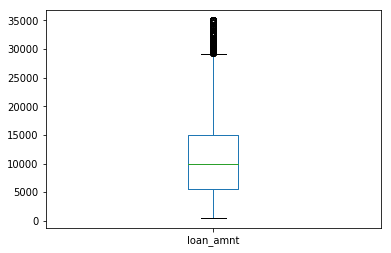

In [97]:
#### Checking for Outliers in our column - loan_amnt

master_loan_dataset.loan_amnt.plot.box()

#### Conclusion: It looks like we have outliers in a range > 30000. Therefore, we can limit our analysis by removing them. Also, it can be seen 50 percentile loan amount is 10, 000 i.e most people have acquired this loan amount.

In [98]:
# Limiting our dataset for loan_amnt

master_loan_dataset_copy = master_loan_dataset[master_loan_dataset.loan_amnt < 30000]

In [99]:
master_loan_dataset_copy.shape

(34380, 44)

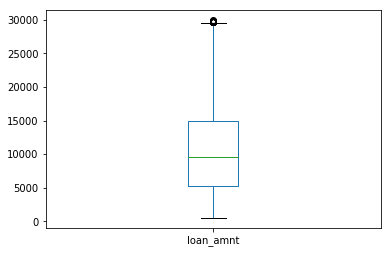

In [100]:
master_loan_dataset_copy.loan_amnt.plot.box()

We have successfully removed the outliers for loan amount data...

In [101]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month'],
      dtype='object')

In [102]:
### Visualising the loan_amount column w.r.t loan status
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month'],
      dtype='object')

In [103]:
def show_labels(graph):
    for p in graph.patches:
        graph.annotate('{:.2f} '.format(p.get_height()), (p.get_x()+0.25, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

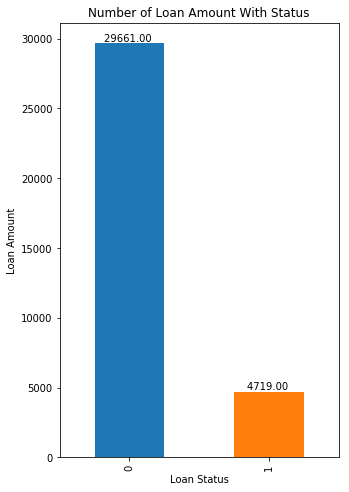

In [104]:
plt.figure(figsize=(5,8))
graph = master_loan_dataset_copy.groupby('loan_status')['loan_amnt'].count().plot.bar()
graph.set_title("Number of Loan Amount With Status")
graph.set_xlabel("Loan Status")
graph.set_ylabel("Loan Amount")    
show_labels(graph)
plt.show()

#### Conclusion: It can be seen from the above bar plots that we have around 30,000 Fully Paid and around 4500 as Charged Off or Defaulters

In [105]:
master_loan_dataset_copy.loan_status.astype('object')

0        1
1        0
3        0
4        0
5        0
6        1
7        0
8        0
9        1
10       0
11       1
12       0
13       0
14       0
15       0
16       0
17       0
18       1
19       0
20       0
21       1
22       0
23       1
24       0
25       0
28       0
29       0
30       0
31       0
32       0
        ..
36403    0
36404    0
36405    0
36406    0
36407    0
36408    0
36409    1
36410    0
36411    0
36412    0
36413    0
36414    0
36415    0
36416    0
36417    0
36418    1
36419    0
36420    1
36421    0
36422    0
36423    1
36424    1
36425    0
36426    0
36427    0
36428    0
36429    0
36430    1
36431    1
36432    0
Name: loan_status, Length: 34380, dtype: object

In [106]:
def dist_plot_variables(df, column):
    plt.figure(figsize=(10,7))
    sns.distplot(df[column])
    plt.show()

    

In [107]:
master_loan_dataset_copy.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,29661.000,10378.022,6317.956,500.000,5200.000,9250.000,14400.000,29900.000
1,4719.000,11291.714,6785.916,1000.000,5600.000,10000.000,15875.000,29700.000


#### Conclusion: It seems like amongst all the loan amount between the people charged off and Fully Paid, the defaulters or Charged Off apply for more loan amount.

In [108]:
### Let's look at anpther column
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month'],
      dtype='object')

In [109]:
master_loan_dataset_copy['loan_bucket_size'] = pd.qcut(master_loan_dataset_copy.loan_amnt, q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL' , 'L', 'M', 'H', 'VH'])

In [110]:
def plot_loan_status_for_default_rate(dataframe, by , loanstatus=1):
    grp = dataframe.groupby(['loan_status',by])[by].mean()
    percentages = grp.unstack()
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of ' + str(by))
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [111]:
def plotLoanStatus(dataframe, by, loanstatus=1, y_label = 'Proportions of loans(Charged-Off) '):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel(y_label)
    show_labels(ax)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

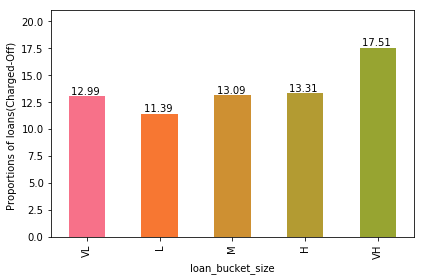

In [112]:
plotLoanStatus(master_loan_dataset_copy, 'loan_bucket_size')
plt.show()

#### Conclusion: The percentage of Charged off increases as the loan amount gets higher and higher. Frequency of loans are in range less than 20k

In [113]:
def plot_default_rate_for_columns(dataframe = None, aggregated_col = None, by_column='loan_status', title = None):
    
    ax = sns.barplot(x = dataframe[by_column], y=dataframe[aggregated_col], data=dataframe)
    ax.set_title(title)
    show_labels(ax)
    plt.margins(0.2, 0.2)
    plt.tight_layout()

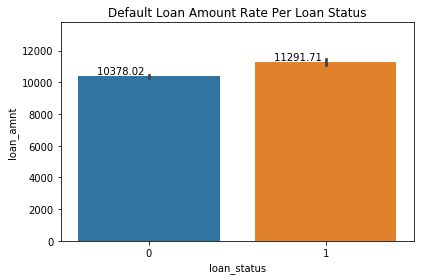

In [114]:
plot_default_rate_for_columns(master_loan_dataset_copy, 'loan_amnt', title = "Default Loan Amount Rate Per Loan Status")

#### Conclusion: The Defaulters on an average tend to take more loan amount as compared to the Fully Paid ones

In [115]:
def categoricalBarPlots_count_wise(df, arr, label = 'plot'):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('YlOrBr_r'))
        show_labels(ax)    

    plt.tight_layout()

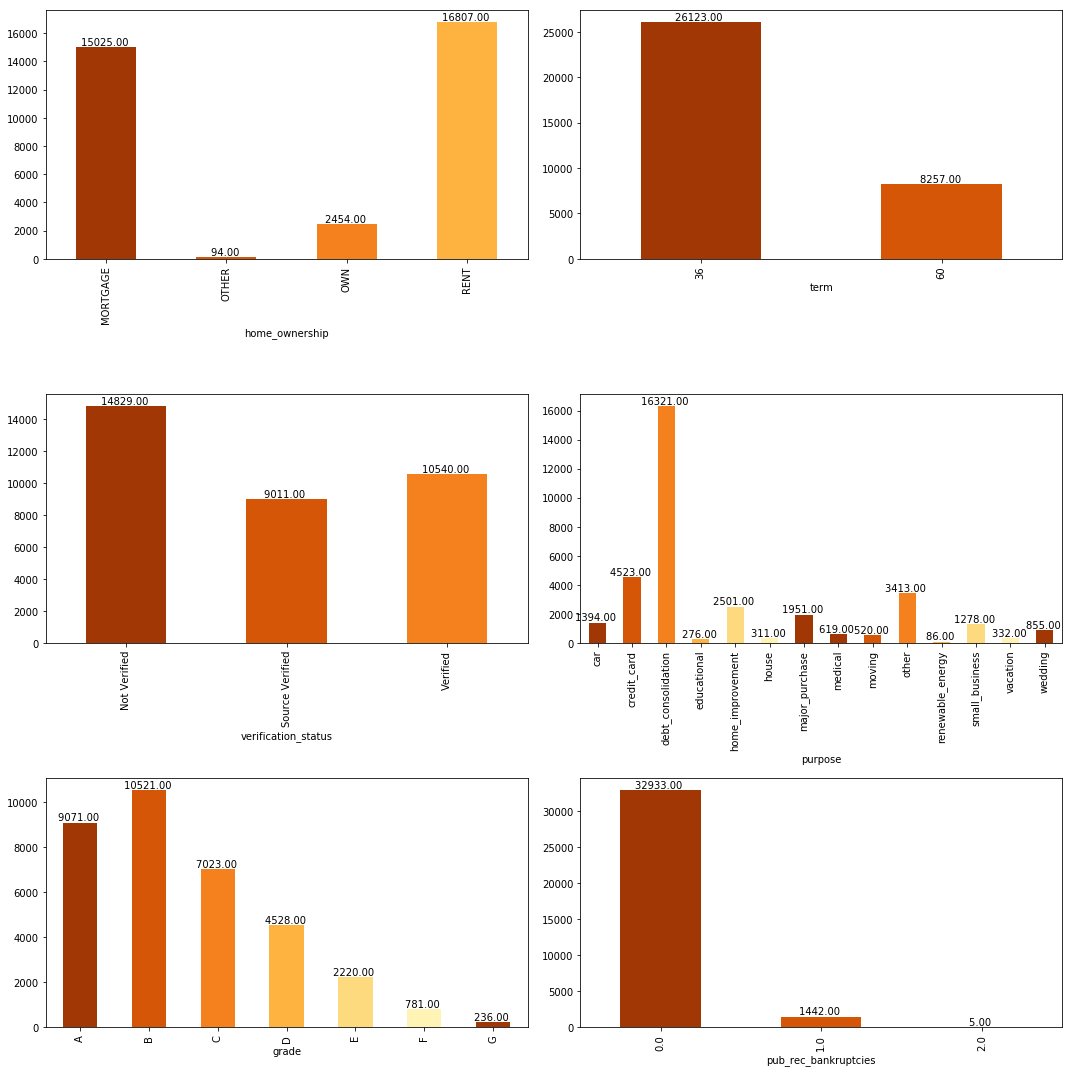

In [116]:
plt.figure(figsize=(15,15))

categorical_variables = ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies']
categoricalBarPlots_count_wise(master_loan_dataset_copy, categorical_variables)


#### Conclusions:
1. For home ownership, most of the people tends to take loan amount for RENT and Mortgage
2. The term column i.e The number of payments on the loan. Values are in months and can be either 36 or 60 from Data dictionary. People tend to take 36 months loan more.
3. Not verified (Letter of Credit) people tends to get more loan amount. This is alarming as source is not verified which can possibly turn to defaulters.
4. For debt consolidation most of the people takes loan.
5. Most loans are high grade.

In [117]:
#### Visualising different Variables

In [118]:
master_loan_dataset_copy.int_rate.value_counts()

10.99%    837
7.51%     729
11.49%    725
7.88%     674
13.49%    668
7.49%     605
9.99%     546
7.90%     508
5.42%     505
11.71%    492
11.99%    429
10.37%    421
12.69%    412
8.49%     400
6.03%     399
5.79%     380
12.99%    365
11.86%    365
10.65%    364
7.29%     360
9.63%     358
12.42%    353
6.62%     350
8.90%     333
10.59%    316
7.14%     315
5.99%     311
6.99%     311
9.91%     310
12.53%    307
         ... 
15.07%      2
15.38%      2
16.08%      2
10.78%      2
12.36%      1
17.44%      1
21.48%      1
17.03%      1
16.20%      1
9.51%       1
17.46%      1
12.49%      1
16.01%      1
24.40%      1
9.83%       1
10.46%      1
13.93%      1
16.33%      1
10.64%      1
11.22%      1
9.01%       1
22.94%      1
10.28%      1
10.91%      1
15.45%      1
17.54%      1
13.30%      1
13.84%      1
18.72%      1
16.96%      1
Name: int_rate, Length: 334, dtype: int64

In [119]:
master_loan_dataset_copy.int_rate = master_loan_dataset.int_rate

In [120]:
#### Cleaning the Interest columns by removing '%' from the values
import re
def clean_data(val):
    match = re.search(r'\d+[.]\d+', val)
    return match.group(0)

master_loan_dataset_copy.int_rate = master_loan_dataset_copy.int_rate.apply(lambda v: float(clean_data(v)))

In [121]:
master_loan_dataset_copy.int_rate.value_counts()

10.990    837
7.510     729
11.490    725
7.880     674
13.490    668
7.490     605
9.990     546
7.900     508
5.420     505
11.710    492
11.990    429
10.370    421
12.690    412
8.490     400
6.030     399
5.790     380
12.990    365
11.860    365
10.650    364
7.290     360
9.630     358
12.420    353
6.620     350
8.900     333
10.590    316
7.140     315
6.990     311
5.990     311
9.910     310
12.530    307
         ... 
21.820      2
20.200      2
15.380      2
20.170      2
10.460      1
22.940      1
16.330      1
10.640      1
17.440      1
16.960      1
17.460      1
11.220      1
12.360      1
24.400      1
10.910      1
13.300      1
15.450      1
17.030      1
13.840      1
10.280      1
13.930      1
16.200      1
17.540      1
9.830       1
21.480      1
12.490      1
16.010      1
9.510       1
18.720      1
9.010       1
Name: int_rate, Length: 334, dtype: int64

In [122]:
# Now as our interest rate data is clean, we can go ahead with our analysis

#### Variable Int_rate

In [123]:
master_loan_dataset_copy.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,29661.000,11.571,3.550,5.420,8.490,11.490,13.980,24.110
1,4719.000,13.772,3.575,5.420,11.360,13.610,16.320,24.400


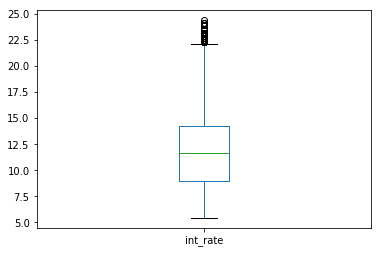

In [124]:
master_loan_dataset_copy.int_rate.plot.box()

In [125]:
## We will have to remove the outliers mentioned in the interest rate column
master_loan_dataset_copy = master_loan_dataset_copy[master_loan_dataset_copy.int_rate < 23]

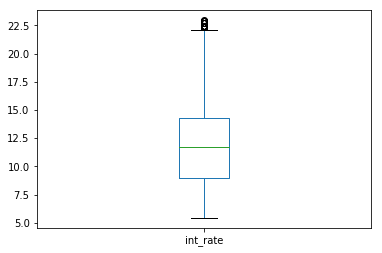

In [126]:
master_loan_dataset_copy.int_rate.plot.box()

In [127]:
#### Conclusion: The average interest rate is around 11%

In [128]:
master_loan_dataset_copy.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,29641.000,11.563,3.537,5.420,8.490,11.490,13.980,22.850
1,4709.000,13.751,3.550,5.420,11.360,13.570,16.320,22.940


#### The interest rate of Charged Off appears to be more as compared to the Fully Paid. This can be seen from differences in averages. 13.751 and 11.563 respectively.

In [129]:
master_loan_dataset_copy['int_rate_bucket_size'] = round(master_loan_dataset_copy.int_rate)

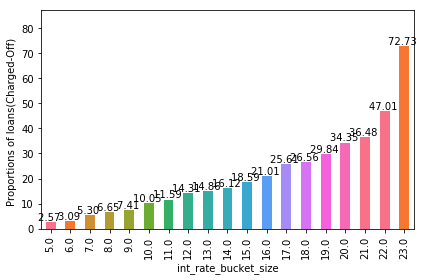

In [130]:
plotLoanStatus(master_loan_dataset_copy, 'int_rate_bucket_size')

#### Bivariate Analysis

In [131]:
def box_plot_variables(df, x, y, title = None):
    axes = sns.boxplot(master_loan_dataset_copy[x], master_loan_dataset_copy[y])
    axes.set_title(title)

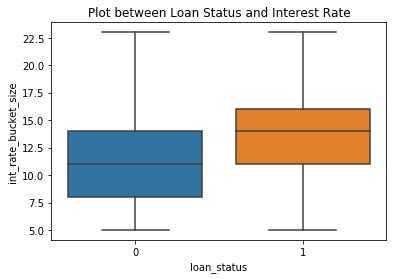

In [132]:
box_plot_variables(master_loan_dataset_copy, 'loan_status', 'int_rate_bucket_size', title="Plot between Loan Status and Interest Rate")
plt.show()

#### Conclusion from Box plot: The interest rate for charged off is much higher than for the Fully Paid. Also, the 25 percentile differs alot in this case.  This can be due to following reasons:-

1. As the bank sees the risk, the interest varies abruptly for Charged Off.
2. FOr charged off customers the interest rate varies from 5% to 22%

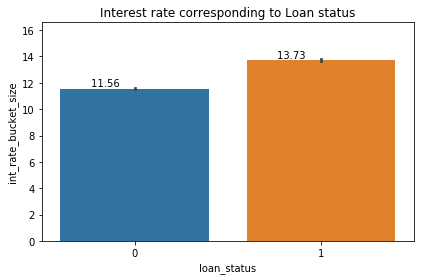

In [133]:
plot_default_rate_for_columns(master_loan_dataset_copy, 'int_rate_bucket_size', title = "Interest rate corresponding to Loan status")
plt.show()

In [134]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month',
       'loan_bucket_size', 'int_rate_bucket_size'],
      dtype='object')

#### Variable Term

In [135]:
# We have done some basic analysis on the term 
# plot_default_rate_for_columns(dataframe=master_loan_dataset_copy, aggregated_col='term', by_column='loan_status')
# plt.show()

master_loan_dataset_copy.term.dtype

dtype('O')

In [136]:
#plt.figure(figsize=(10,8))
master_loan_dataset_copy['term_int'] = master_loan_dataset_copy.term.astype(int)


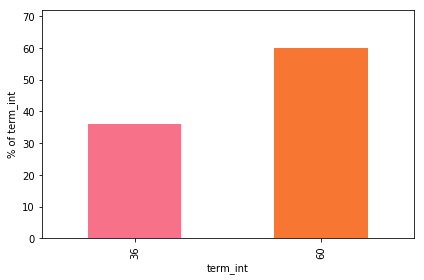

In [137]:
plot_loan_status_for_default_rate(master_loan_dataset_copy, 'term_int')
plt.show()

In [138]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex = False):
    plt.subplot(1, 2, 1)
    values = (dataframe[by].value_counts(normalize=True)*100)
    
    if sortbyindex:
        values = values.sort_index()
    
    ax = values.plot.bar(color=sns.color_palette('RdYlBu_r', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    show_labels(ax)
    
    # This part displays the value_counts_plot for the charged off or defaulters...
    plt.subplot(1, 2, 2)
    values = (dataframe.loc[dataframe['loan_status'] == 1 ][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    
    ax = values.plot.bar(color=sns.color_palette('RdYlBu_r', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    show_labels(ax)

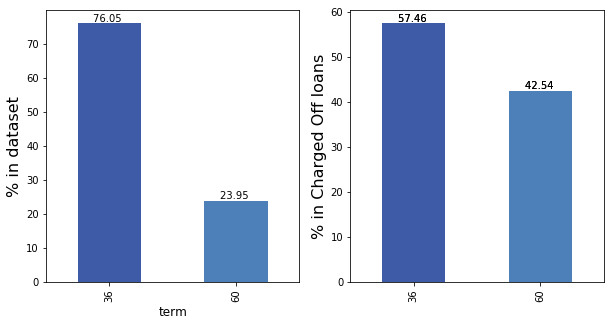

In [139]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan_dataset_copy, 'term')

#### Conclusion:
1. Overall 75% of the total loans are given for duration of 3 years, whereas 25% of the loans are those given for 5 years.
2. Among Charged Off loans, percentage of term 60 months rises to 43%


### Let's do for more variables..
We are till now done with term, int_rate and loan_amnt

In [140]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month',
       'loan_bucket_size', 'int_rate_bucket_size', 'term_int'],
      dtype='object')

#### Variable Installment

In [141]:
master_loan_dataset_copy.installment.dtype

dtype('float64')

In [142]:
# plotLoanStatus(master_loan_dataset_copy, 'installment')
# plt.show()
master_loan_dataset_copy.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,29641.000,307.429,186.060,16.080,164.910,271.910,404.940,1082.900
1,4709.000,315.390,187.327,22.790,168.620,285.950,421.890,995.080


In [143]:
master_loan_dataset_copy['installment_bucket_size'] = round(master_loan_dataset_copy.installment)


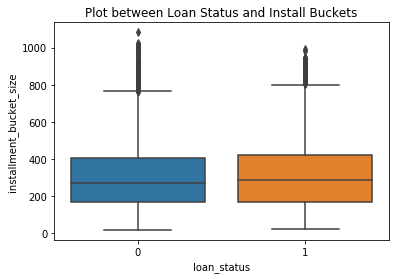

In [144]:
box_plot_variables(master_loan_dataset_copy, 'loan_status', 'installment_bucket_size', title="Plot between Loan Status and Install Buckets")
plt.show()

#### Conclusions:
1. Loans with Charged Off have slightly higher number of installments.
2. The installment amount varies largely from 168 to 420. 

#### Variable Grade

In [145]:
master_loan_dataset_copy.grade.value_counts()

B    10521
A     9071
C     7023
D     4528
E     2220
F      781
G      206
Name: grade, dtype: int64

In [146]:
# Grade is an categorical variable, we can use our plot percentages function 

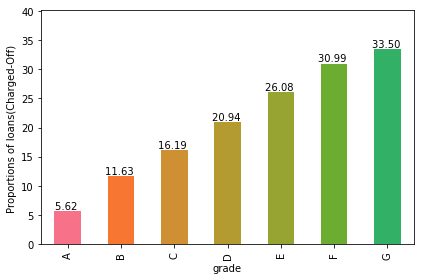

In [147]:
plotLoanStatus(master_loan_dataset_copy, 'grade')
plt.show()

#### Conclusion: As grade is increasing the defaulters seem to increase, the maximum increase is for grade 'G' i.e 33%

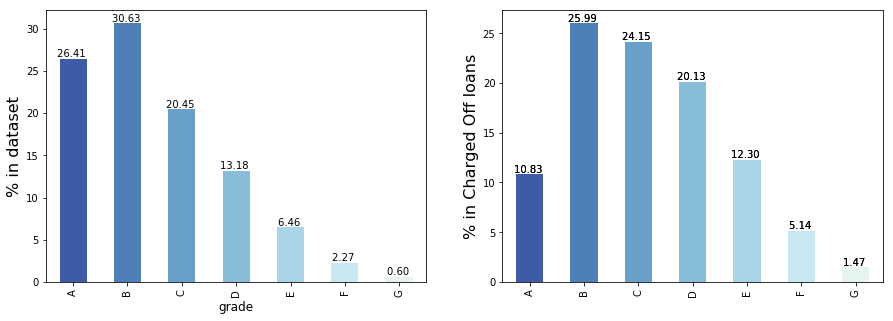

In [148]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan_dataset_copy, 'grade',True)

#### Conclusions:
1. Grade A and B are safe loans as compared to E, F, G which are highly unsafe.
2. There is an increase in the overall dataset as compared with Charged off loans.

#### Variable - subgrade

In [149]:
master_loan_dataset_copy.sub_grade.value_counts()

A4    2630
B3    2516
A5    2462
B5    2393
B4    2210
C1    1833
B2    1808
C2    1735
A3    1628
B1    1594
C3    1346
A2    1346
D2    1163
C4    1091
C5    1018
A1    1005
D3     990
D1     833
D4     815
D5     727
E1     623
E2     517
E3     431
E4     358
E5     291
F1     248
F2     191
F3     140
F4     121
F5      81
G1      70
G2      56
G3      32
G4      32
G5      16
Name: sub_grade, dtype: int64

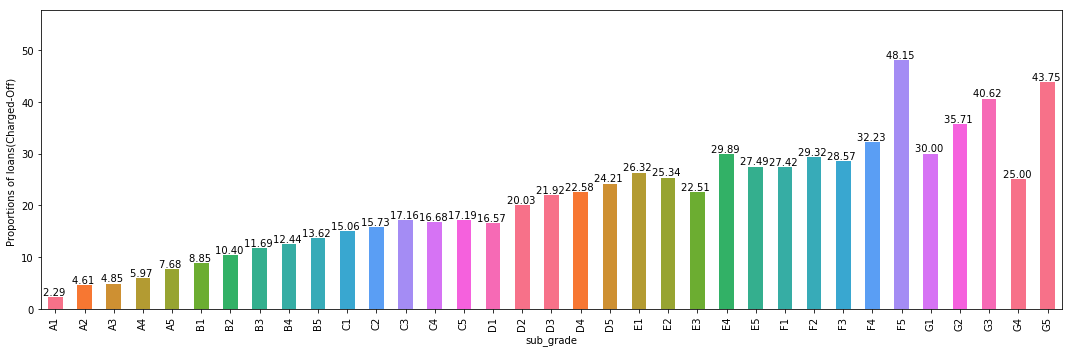

In [150]:
plt.figure(figsize=(15,5))
plotLoanStatus(master_loan_dataset_copy, 'sub_grade')

#### Variable - emp title

In [151]:
master_loan_dataset_copy.emp_title.value_counts()

us army                                               193
bank of america                                       129
walmart                                                76
at&t                                                   74
wells fargo                                            64
kaiser permanente                                      62
ibm                                                    61
verizon wireless                                       59
ups                                                    56
us air force                                           55
self                                                   55
usps                                                   55
self employed                                          50
usaf                                                   48
walgreens                                              47
us postal service                                      43
target                                                 42
lockheed marti

In [152]:
top15_titles_emp = master_loan_dataset_copy.emp_title.value_counts(ascending=False)[:15]
print(top15_titles_emp)

us army              193
bank of america      129
walmart               76
at&t                  74
wells fargo           64
kaiser permanente     62
ibm                   61
verizon wireless      59
ups                   56
us air force          55
self                  55
usps                  55
self employed         50
usaf                  48
walgreens             47
Name: emp_title, dtype: int64


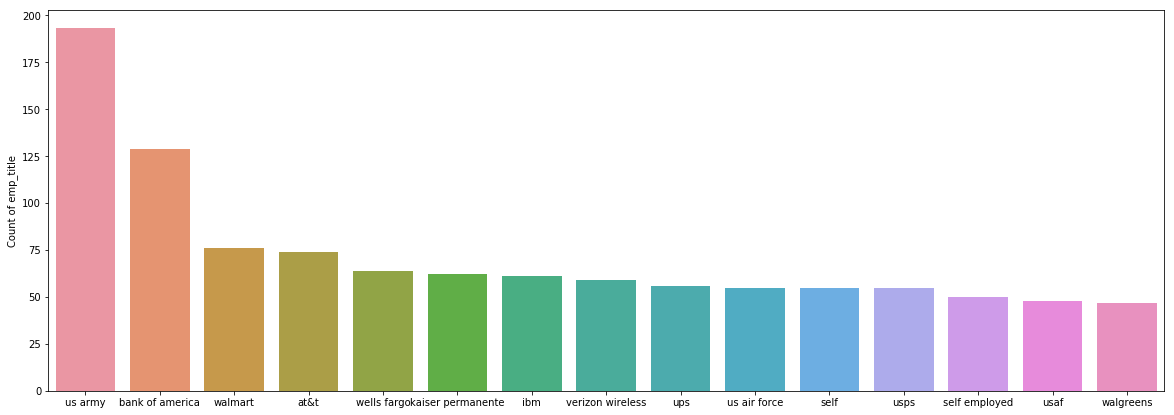

In [153]:
#### Let's plot only top 10 titles for an employee and see what the distribution looks like
plt.figure(figsize=(20,7))
a=sns.barplot(x=top15_titles_emp.index, y=top15_titles_emp.values)
a.set_ylabel('Count of emp_title')
plt.show()

#### Conclusions:
1. Most of the employees have title 'US ARMY' followed by 'Bank Of America'. Therefore, we can conclude that the employees with these top 15 employee titles tend to take more loans..

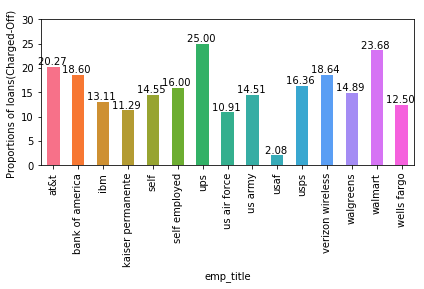

In [154]:
# We can again plot our emp titles against the charged off loans distribution..
plotLoanStatus(master_loan_dataset_copy[master_loan_dataset_copy['emp_title'].isin(top15_titles_emp.index.values)], 'emp_title')
plt.show()

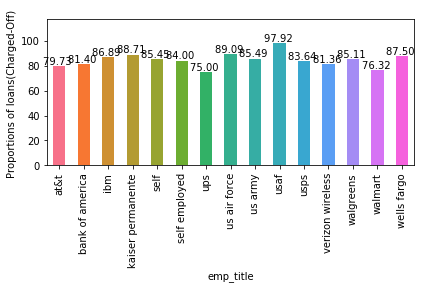

In [155]:
# We can again plot our emp titles against the fully paid loans distribution..
plotLoanStatus(master_loan_dataset_copy[master_loan_dataset_copy['emp_title'].isin(top15_titles_emp.index.values)], 'emp_title', loanstatus=0)
plt.show()

#### Conclusions: 
1. From the above two plots, it can be seen that USAF titled employees are paying their loan regularly as compared to any other sectors. 
2. Ups titled employees are th highest who got Charged Off customers.

### Variable - emp_length

In [156]:
### Next Variable - emp_length

master_loan_dataset_copy.emp_length.value_counts()

10    7646
2     4003
0     3897
3     3751
4     3131
5     2958
1     2905
6     2002
7     1590
8     1314
9     1153
Name: emp_length, dtype: int64

In [157]:
master_loan_dataset_copy.emp_length.dtype

dtype('int64')

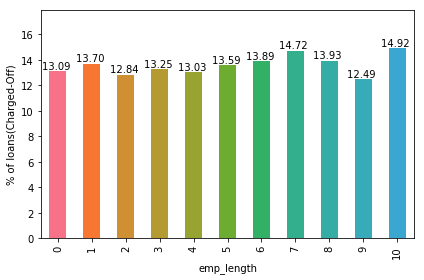

In [158]:
plotLoanStatus(master_loan_dataset_copy, 'emp_length', y_label='% of loans(Charged-Off)')
plt.show()

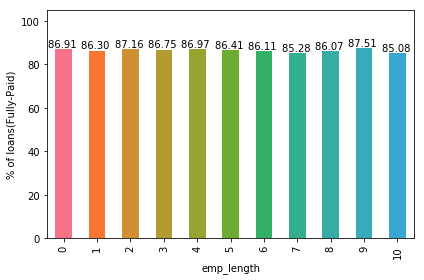

In [159]:
# Fully Paid employee plot w.r.t employee length...
plotLoanStatus(master_loan_dataset_copy, 'emp_length', loanstatus=0, y_label='% of loans(Fully-Paid)')
plt.show()

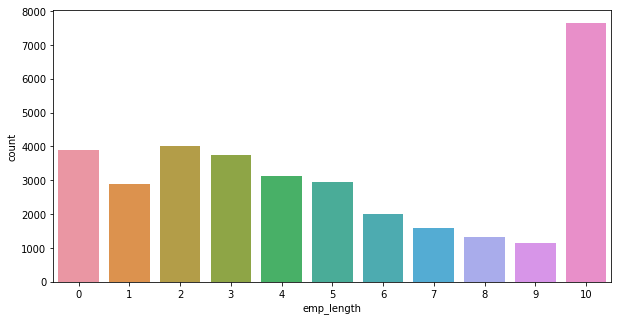

In [160]:
plt.figure(figsize=(10,5))
sns.countplot(master_loan_dataset_copy['emp_length'], order=sorted(master_loan_dataset_copy.emp_length.unique()))
plt.show()


#### Conclusions: 
1. Employees with more or within 10 years of experience tend to take more loans than any other people.
2. We can see that employee length of 10 years are more Charged Off.

In [161]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month',
       'loan_bucket_size', 'int_rate_bucket_size', 'term_int',
       'installment_bucket_size'],
      dtype='object')

#### Variable - home_ownership 

In [162]:
# Let's look at our categorical column home ownership first before proceeding with analysis..

master_loan_dataset_copy.home_ownership.value_counts()

RENT        16793
MORTGAGE    15010
OWN          2453
OTHER          94
Name: home_ownership, dtype: int64

In [163]:
master_loan_dataset_copy.groupby('loan_status')['home_ownership'].describe()

,count,unique,top,freq
loan_status,,,,
0,29641,4,RENT,14348
1,4709,4,RENT,2445


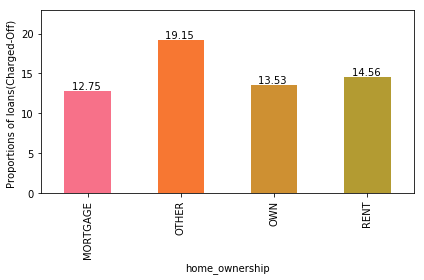

In [164]:
plotLoanStatus(master_loan_dataset_copy, 'home_ownership')

#### Conclusion: The most Charged-Off loans are from 'OTHER' category in home ownership.

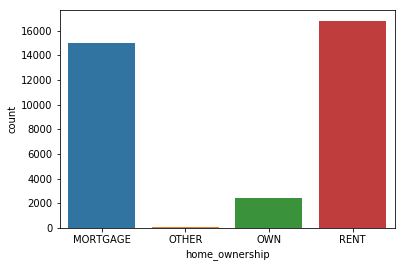

In [165]:
sns.countplot(master_loan_dataset_copy['home_ownership'], order=sorted(master_loan_dataset_copy.home_ownership.unique()))
plt.show()

#### Conclusion:
1. Most people tend to buy loans for 'RENT' as compared to any other categories whereas very few pwople take loans for 'OTHER'

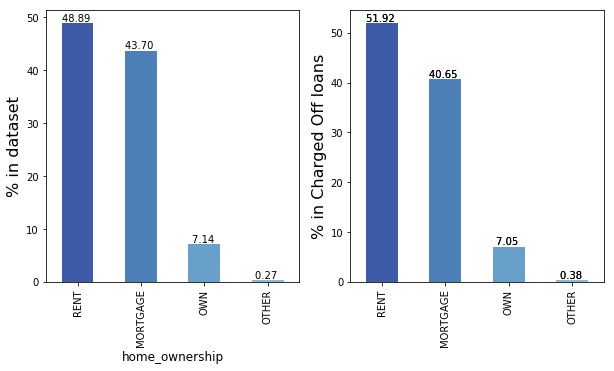

In [166]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan_dataset_copy, 'home_ownership')

In [167]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month',
       'loan_bucket_size', 'int_rate_bucket_size', 'term_int',
       'installment_bucket_size'],
      dtype='object')

In [168]:
master_loan_dataset_copy.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,29641.000,68523.191,64971.335,4000.000,42000.000,60000.000,82000.000,6000000.000
1,4709.000,60928.397,45736.429,4080.000,37513.000,52000.000,72000.000,1250000.000


In [169]:
master_loan_dataset_copy.annual_inc.value_counts()

60000.000     1313
50000.000      932
40000.000      778
45000.000      745
65000.000      715
30000.000      705
75000.000      701
70000.000      643
48000.000      619
55000.000      604
80000.000      563
42000.000      543
36000.000      531
90000.000      487
35000.000      465
72000.000      428
85000.000      412
100000.000     404
120000.000     394
52000.000      360
54000.000      337
24000.000      324
110000.000     271
95000.000      243
62000.000      238
78000.000      228
38000.000      212
25000.000      212
32000.000      201
58000.000      197
              ... 
190300.000       1
47540.000        1
103008.000       1
70572.000        1
120456.000       1
51669.000        1
95142.000        1
62366.400        1
86945.000        1
17640.000        1
29766.840        1
43872.000        1
36276.000        1
59850.000        1
86923.000        1
31970.000        1
95111.000        1
31404.000        1
36184.800        1
81972.000        1
9840.000         1
39359.000   

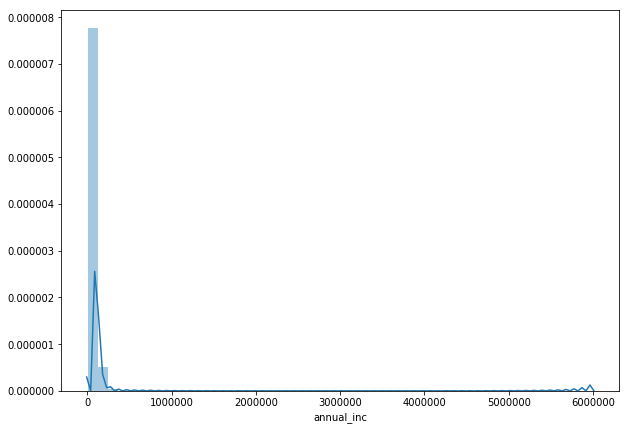

In [170]:
plt.figure(figsize=(10,5))
dist_plot_variables(master_loan_dataset_copy, 'annual_inc')
plt.show()

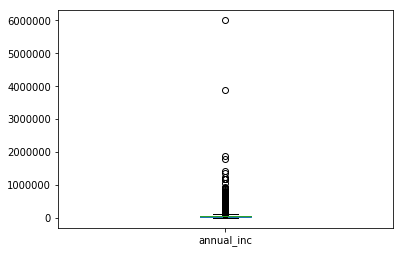

In [171]:
master_loan_dataset_copy.annual_inc.plot.box()

#### Conclusions:
1. From the annual income box plot we see that most of the annual income lies between 20lakhs.
2. We see that maximum annual income (outliers) have income above 40 lakhs.

In [172]:
# Limiting our dataset just to 2,60000 by removing the external outliers...
df_annual_income = master_loan_dataset_copy[master_loan_dataset_copy.annual_inc <= 260000]

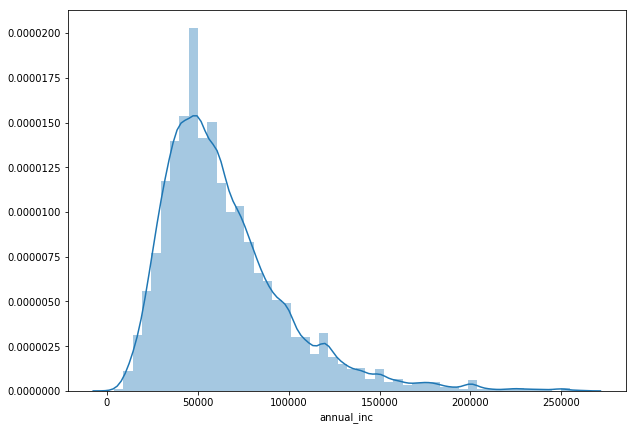

In [173]:
dist_plot_variables(df_annual_income, 'annual_inc')

[Text(0,0,'0-10k'),
 Text(1,0,'10-20k'),
 Text(2,0,'20-30k'),
 Text(3,0,'30-40k'),
 Text(4,0,'40-50k'),
 Text(5,0,'50-60k'),
 Text(6,0,'60-70k'),
 Text(7,0,'70-80k'),
 Text(8,0,'80-90k'),
 Text(9,0,'90-100k'),
 Text(10,0,'100-110k'),
 Text(11,0,'110-120k'),
 Text(12,0,'120-130k'),
 Text(13,0,'130-140k'),
 Text(14,0,'140-150k'),
 Text(15,0,'150-160k'),
 Text(16,0,'160-170k'),
 Text(17,0,'170-180k'),
 Text(18,0,'180-190k'),
 Text(19,0,'190-200k'),
 Text(20,0,'200-210k')]

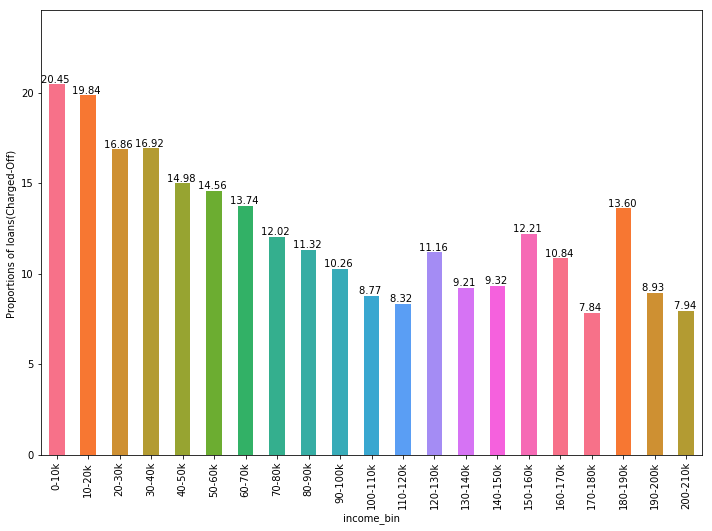

In [174]:
#Create Derived categorical variable
master_loan_dataset_copy['income_bin'] = master_loan_dataset_copy['annual_inc']/10000
#master_loan['income_bin'] = pd.cut(master_loan['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
master_loan_dataset_copy['income_bin'] = master_loan_dataset_copy['income_bin'].astype(int)

plt.figure(figsize=(10,7))
ax = plotLoanStatus(master_loan_dataset_copy.loc[master_loan_dataset_copy['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

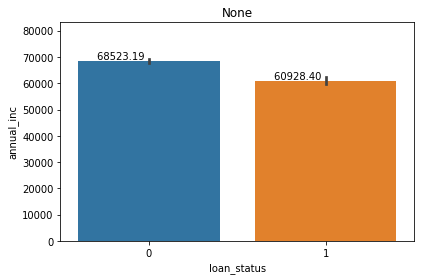

In [175]:
plot_default_rate_for_columns(master_loan_dataset_copy, 'annual_inc')

#### Conclusions:
1. We can see the differences in the plot of default rates of Charged and Fully Paid. The average default rate difference is alomost about 7595.


In [176]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month',
       'loan_bucket_size', 'int_rate_bucket_size', 'term_int',
       'installment_bucket_size', 'income_bin'],
      dtype='object')

#### Variable Verification Status

In [177]:
master_loan_dataset_copy.verification_status.value_counts()

Not Verified       14824
Verified           10522
Source Verified     9004
Name: verification_status, dtype: int64

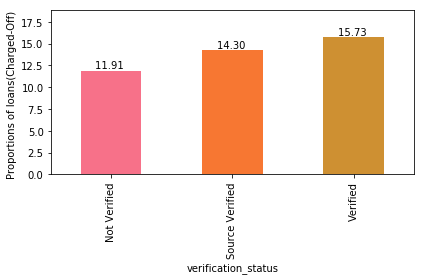

In [178]:
plotLoanStatus(master_loan_dataset_copy, 'verification_status')
plt.show()

#### Conclusion: By seeing verification status we can see that mostly Charged Off loans are from 'Verified' Category

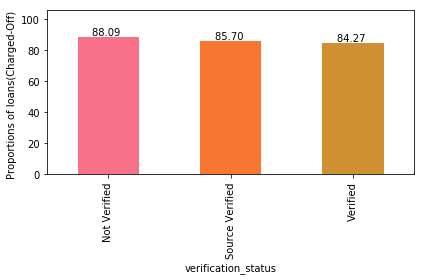

In [179]:
# Plotting for the Fully Paid status...

plotLoanStatus(master_loan_dataset_copy, 'verification_status', loanstatus=0)
plt.show()

#### Conclusion: Majority of Fully Paid loans are from Not Verified category. This can be a risk for Lending club as without verification customer is at high risk of defaulting.

#### Variable - purpose

In [180]:
master_loan_dataset_copy.purpose.value_counts()

debt_consolidation    16304
credit_card            4518
other                  3410
home_improvement       2500
major_purchase         1950
car                    1394
small_business         1278
wedding                 854
medical                 619
moving                  520
vacation                332
house                   310
educational             276
renewable_energy         85
Name: purpose, dtype: int64

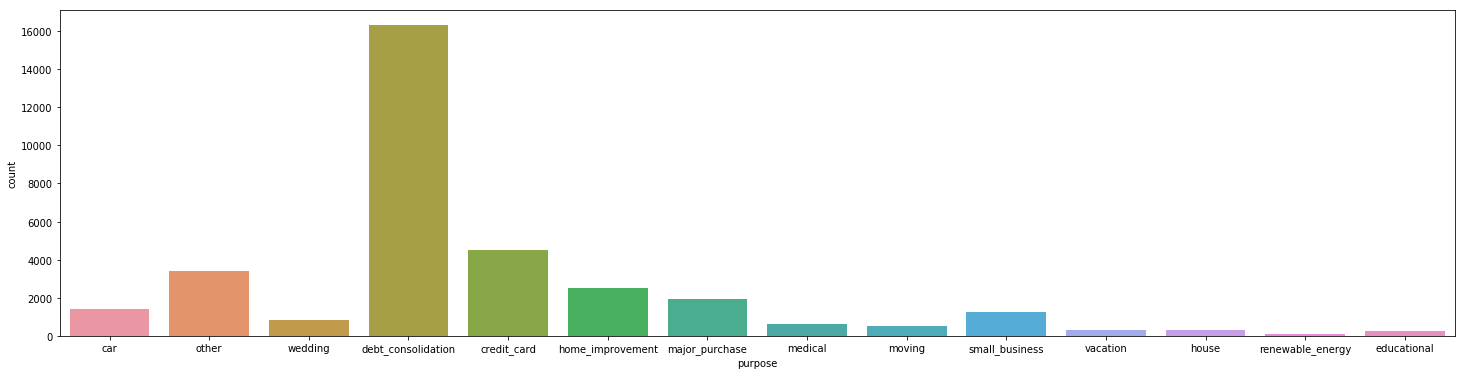

In [181]:
### Count plot to check what is the frequency of loans acquired by each state...
plt.figure(figsize=(25,6))
sns.countplot(x = "purpose", data=master_loan_dataset_copy)
plt.show()


#### Conclusions:
1. Debt consolidation purpose is a top sector for loans.

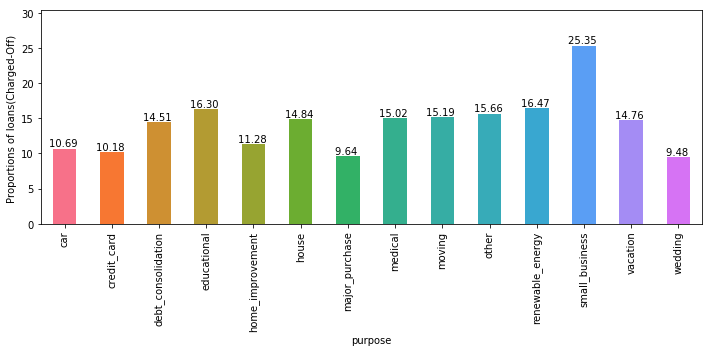

In [182]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan_dataset_copy, 'purpose')
plt.show()

#### Conclusions
1. Mostly charged off loans are from Small business.
2. Debt consolidation being the highest amongst the purpose also have a higher risk to be Charged Off.

#### Variable - title

In [183]:
# This variable consists of year and months. Therefore, plotting them all at once..

master_loan_dataset_copy.title.value_counts()[:10]

debt consolidation           2634
debt consolidation loan      1543
personal loan                 860
consolidation                 621
personal                      466
home improvement              464
credit card consolidation     433
consolidation loan            302
credit card loan              301
loan                          274
Name: title, dtype: int64

In [184]:
# Categorical variable..
master_loan_dataset_copy.purpose.value_counts()

debt_consolidation    16304
credit_card            4518
other                  3410
home_improvement       2500
major_purchase         1950
car                    1394
small_business         1278
wedding                 854
medical                 619
moving                  520
vacation                332
house                   310
educational             276
renewable_energy         85
Name: purpose, dtype: int64

In [185]:
len(master_loan_dataset_copy.title.unique())

15685

In [186]:
#### Conclusion: There are only 15685 values unique and also, purpose has the same information, we can therefore, drop this column

master_loan_dataset_copy = master_loan_dataset_copy.drop('title', axis=1)

#### Variable - addr_state

In [187]:
master_loan_dataset_copy.addr_state.value_counts()[:10]

CA    6223
NY    3287
FL    2470
TX    2363
NJ    1605
PA    1349
IL    1342
VA    1223
GA    1218
MA    1158
Name: addr_state, dtype: int64

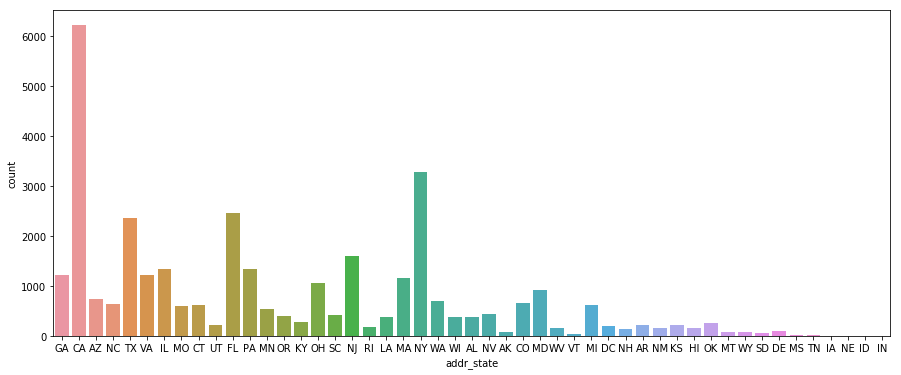

In [188]:
### Count plot to check what is the frequency of loans acquired by each state...
plt.figure(figsize=(15,6))
sns.countplot(x = "addr_state", data=master_loan_dataset_copy)
plt.show()


#### Conclusion:
1. State 'CA' have acquired more loans from Lending club.

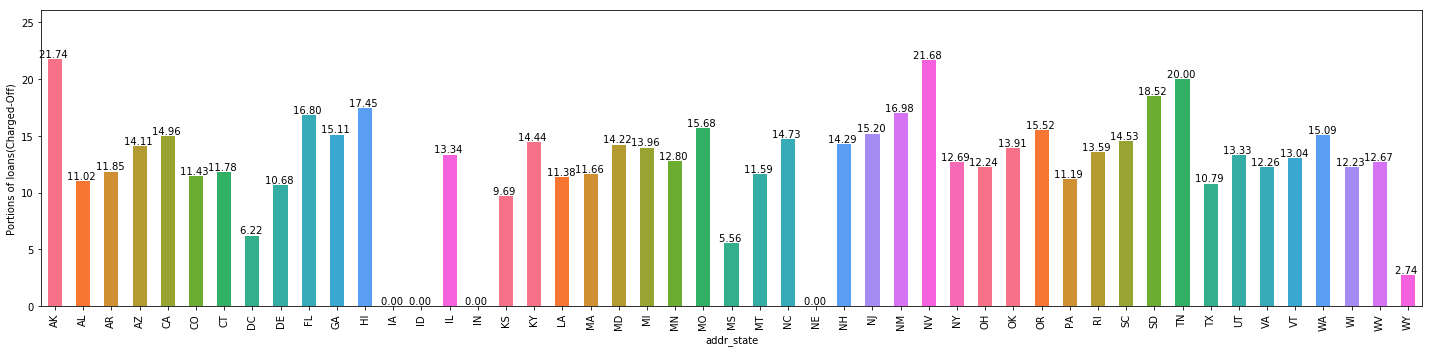

In [189]:
# Charged Off loans plot for loan status...
plt.figure(figsize=(20,5))
plotLoanStatus(master_loan_dataset_copy, 'addr_state', y_label='Portions of loans(Charged-Off)')
plt.show()

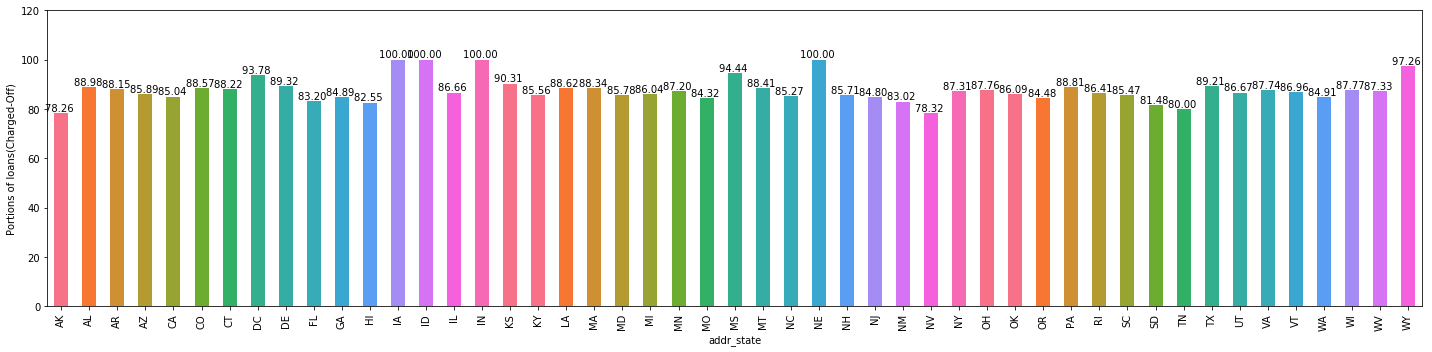

In [190]:
# Let's investigate for Fully Paid loans..
plt.figure(figsize=(20,5))
plotLoanStatus(master_loan_dataset_copy, 'addr_state', loanstatus=0, y_label='Portions of loans(Charged-Off)')
plt.show()

#### Conclusion:
1. 'AK' state has more charged off loans value. This can be investigated by Lending club.
2. States with higher Charge Off rates have very low number of loans.

#### Variable - dti

In [191]:
master_loan_dataset_copy.dti.value_counts().head(5)

0.000     139
12.000     38
19.200     37
12.480     36
13.200     36
Name: dti, dtype: int64

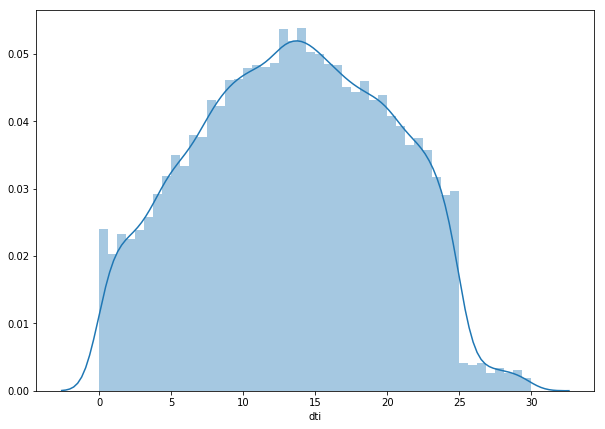

In [192]:
dist_plot_variables(master_loan_dataset_copy, 'dti')

In [193]:
# We can divide the dti variable to bins of 5 as seen in the distribution.

master_loan_dataset_copy['dti_bin'] = pd.cut(master_loan_dataset_copy['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

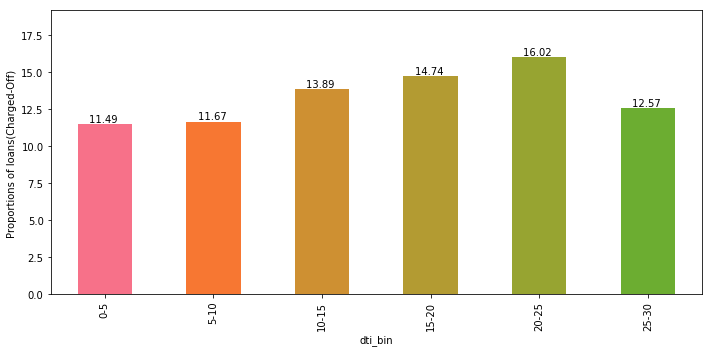

In [194]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan_dataset_copy, 'dti_bin')
plt.show()


#### Conclusion:
1. 20-25 debt to income ratio have higher charged off loans proportion as compared to any other category.
2. It can be therefore implied that higher the DTI, higher the risk for loans to be fully paid and more chances of getting 'Charged Off'

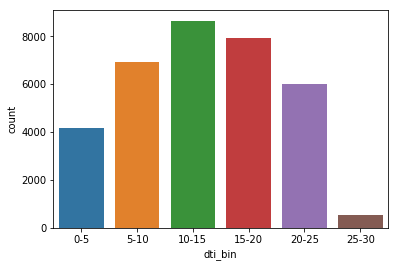

In [195]:
sns.countplot(x="dti_bin", data=master_loan_dataset_copy)
plt.show()

#### Conclusion:
1. It seems interesting to see that most of the loans are acquired for dti 10-15 but 20-25 are highly charged off.

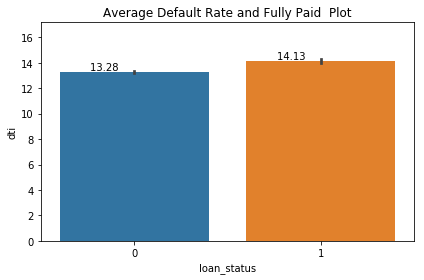

In [196]:
plot_default_rate_for_columns(master_loan_dataset_copy, 'dti', title = 'Average Default Rate and Fully Paid  Plot')
plt.show()

#### Variable - delinq_2yrs

In [197]:
master_loan_dataset_copy.delinq_2yrs.value_counts()

0     30630
1      2847
2       595
3       187
4        52
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

In [198]:
# Delinquent basically means that person hasn't paid the loan for 2 or more than n years...
master_loan_dataset_copy.delinq_2yrs.value_counts(normalize=True)


0    0.892
1    0.083
2    0.017
3    0.005
4    0.002
5    0.001
6    0.000
7    0.000
8    0.000
11   0.000
9    0.000
Name: delinq_2yrs, dtype: float64

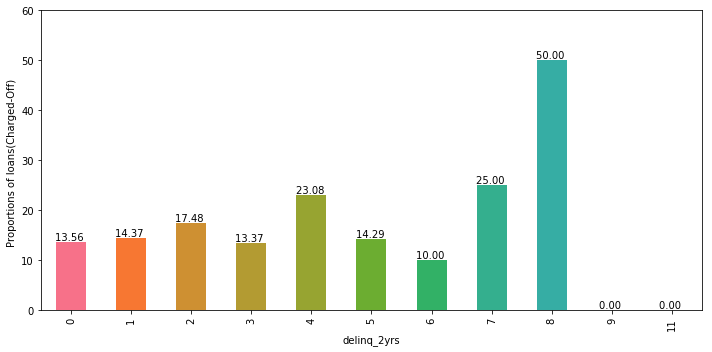

In [199]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan_dataset_copy, 'delinq_2yrs')
plt.show()

#### Conclusion:
1. The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.

2. Most of the charged off loans are the ones with 8 years of delinquency..


#### Variable - earlies_cr_line

In [200]:
# Earliesr Cr line - The month the borrower's earliest reported credit line was opened.

In [201]:
master_loan_dataset_copy.earliest_cr_line_year.value_counts(normalize=True).head()

2000   0.084
1999   0.077
1998   0.072
2001   0.066
1997   0.063
Name: earliest_cr_line_year, dtype: float64

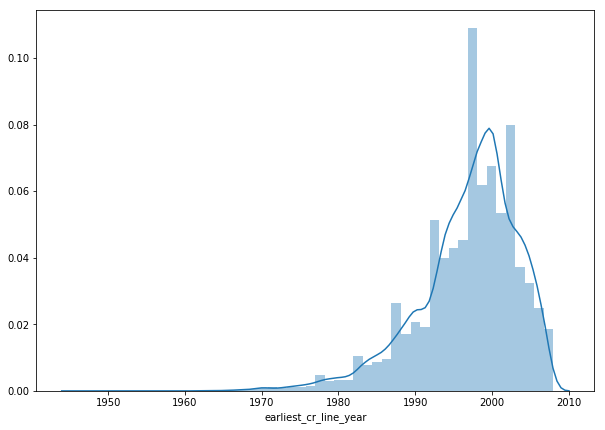

In [202]:
dist_plot_variables(master_loan_dataset_copy, 'earliest_cr_line_year')

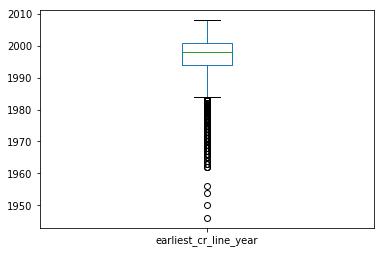

In [203]:
master_loan_dataset_copy.earliest_cr_line_year.plot.box()

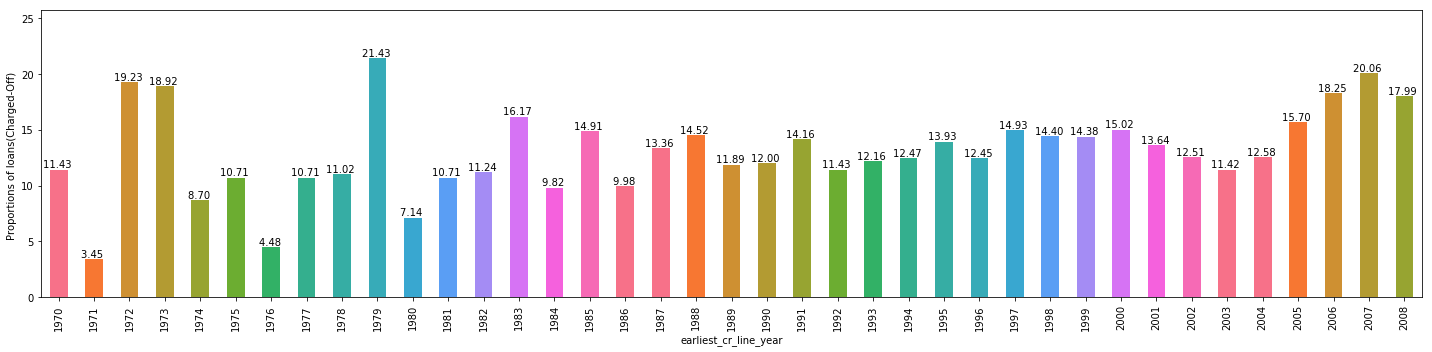

In [204]:
# As it is seen from both the plots that we have lower outlier range starting from 1969 to below years. 
# Therefore we can start plotting our year wise pot greater than 1969.

plt.figure(figsize=(20,5))
plotLoanStatus(master_loan_dataset_copy.loc[master_loan_dataset_copy['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

#### Conclusion: 
1. Most of the loans (Charged Off) went up after year 2000.

#### Variable - inq_last_6mths

In [205]:
master_loan_dataset_copy.inq_last_6mths.value_counts()

0    16703
1     9504
2     5054
3     2625
4      264
5      116
6       47
7       28
8        9
Name: inq_last_6mths, dtype: int64

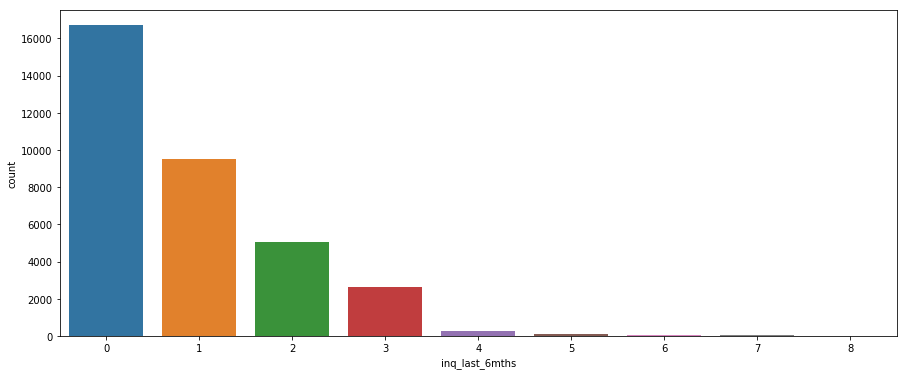

In [206]:
plt.figure(figsize=(15,6))
sns.countplot(x = "inq_last_6mths", data=master_loan_dataset_copy)
plt.show()


#### Conclusion:
1. Most of the loans were inquired for less than 3 months.

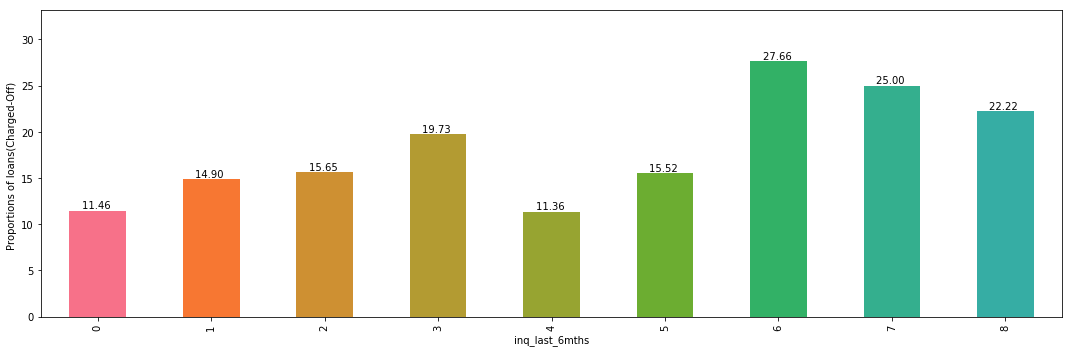

In [207]:
# Let's check the loan status for our default.

plt.figure(figsize=(15,5))
plotLoanStatus(master_loan_dataset_copy, 'inq_last_6mths')
plt.show()

#### Conclusion:
1. Most of the loans defaulted are after 6 inquiries.

In [208]:
#### Variable - open_acc

master_loan_dataset_copy.open_acc.value_counts()[:10]

7     3499
6     3460
8     3417
9     3228
5     2777
10    2758
11    2396
4     2009
12    1984
13    1637
Name: open_acc, dtype: int64

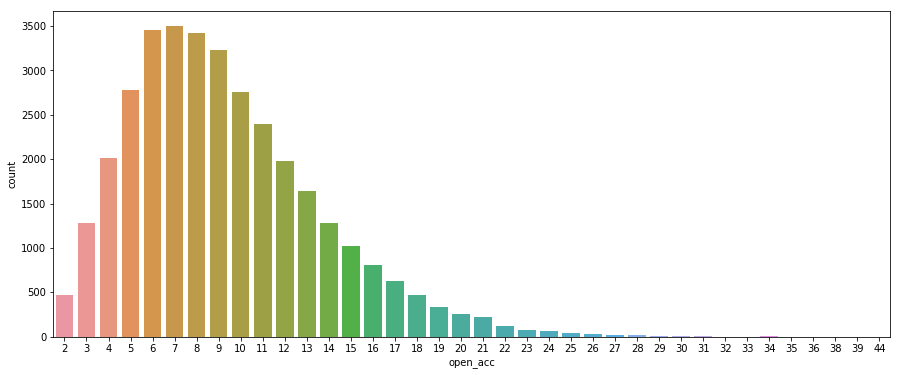

In [209]:
plt.figure(figsize=(15,6))
sns.countplot(x = "open_acc", data=master_loan_dataset_copy)
plt.show()


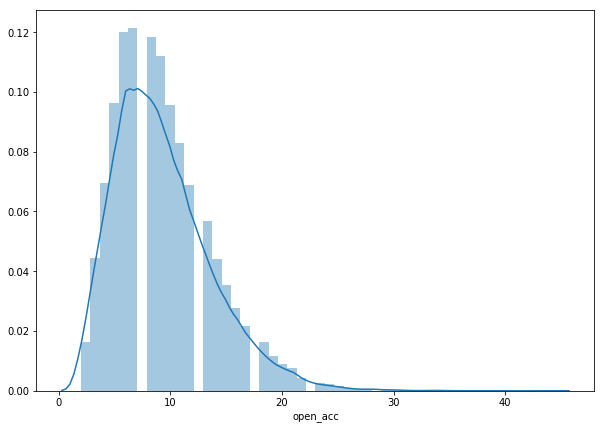

In [210]:
dist_plot_variables(master_loan_dataset_copy, 'open_acc')

In [211]:
master_loan_dataset_copy.open_acc.mean()

9.286928675400292

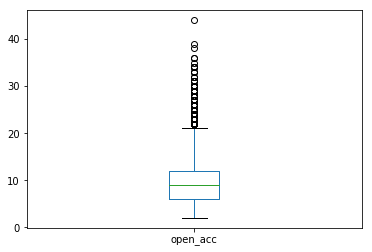

In [212]:
master_loan_dataset_copy.open_acc.plot.box()

In [213]:
master_loan_dataset_copy.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,29641.000,9.295,4.350,2.000,6.000,9.000,12.000,44.000
1,4709.000,9.238,4.476,2.000,6.000,9.000,12.000,38.000


#### Conclusions:
1. There is not much difference in the means of defalted and fully paid open account
2. Distribution sugests that by large the borrower's seem to have 9 open credit lines.

#### Variable - pub_rec

In [214]:

master_loan_dataset_copy.pub_rec.value_counts()

0    32525
1     1772
2       44
3        7
4        2
Name: pub_rec, dtype: int64

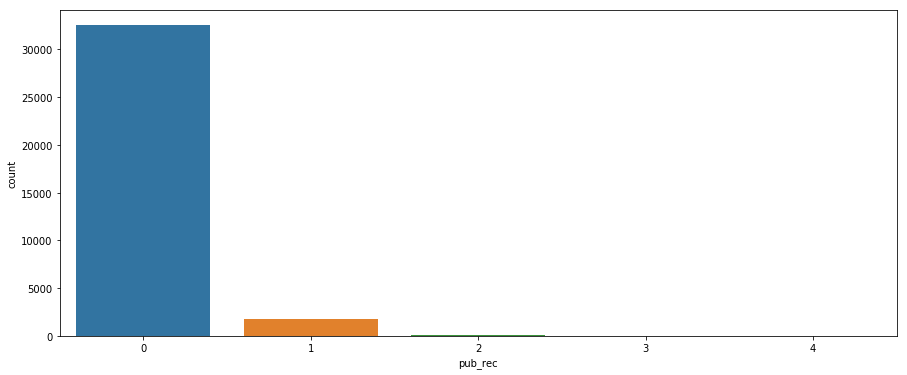

In [215]:
plt.figure(figsize=(15,6))
sns.countplot(x = "pub_rec", data=master_loan_dataset_copy)
plt.show()


#### Conclusion:
1. 94% of the people have no public derogatory records.

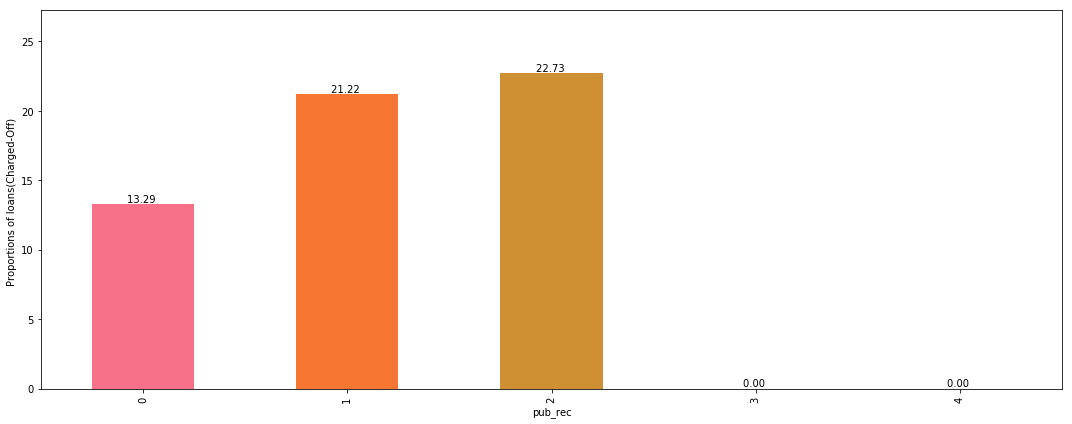

In [216]:
plt.figure(figsize=(15,6))
plotLoanStatus(master_loan_dataset_copy, 'pub_rec')
plt.show()

#### Conclusions:
1. Most people with 2 pub rec defaults..
2. Charged off chances increases with even 1 public derogatory record.

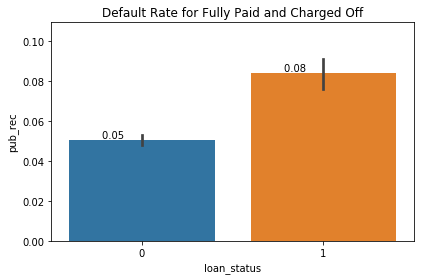

In [217]:
plot_default_rate_for_columns(master_loan_dataset_copy, 'pub_rec', title = 'Default Rate for Fully Paid and Charged Off')

In [218]:
master_loan_dataset_copy.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,29641.000,0.050,0.229,0.000,0.000,0.000,0.000,4.000
1,4709.000,0.084,0.285,0.000,0.000,0.000,0.000,2.000


In [219]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month',
       'loan_bucket_size', 'int_rate_bucket_size', 'term_int',
       'installment_bucket_size', 'income_bin', 'dti_bin'],
      dtype='object')

#### Variable - revol_bal

In [220]:
master_loan_dataset_copy.revol_bal.value_counts()[:10]

0       805
1        11
39        9
798       8
23        8
1815      8
865       8
2639      8
66        8
10        8
Name: revol_bal, dtype: int64

In [221]:
master_loan_dataset_copy.revol_bal.dtype


dtype('int64')

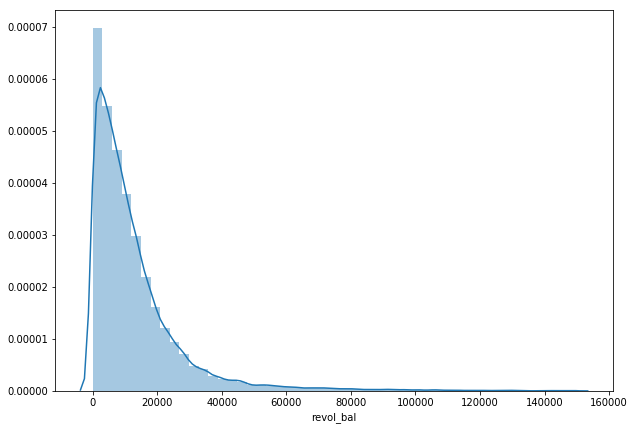

In [222]:
dist_plot_variables(master_loan_dataset_copy, 'revol_bal')

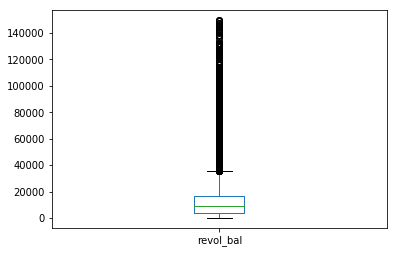

In [223]:
master_loan_dataset_copy.revol_bal.plot.box()

There are so many outliers for this revol_bal column. We can remove the column following our +3 and -3 std dev rule.

In [224]:
master_loan_dataset_copy = master_loan_dataset_copy[np.abs(master_loan_dataset_copy.revol_bal-master_loan_dataset_copy.revol_bal.mean()) <= (3*master_loan_dataset_copy.revol_bal.std())]


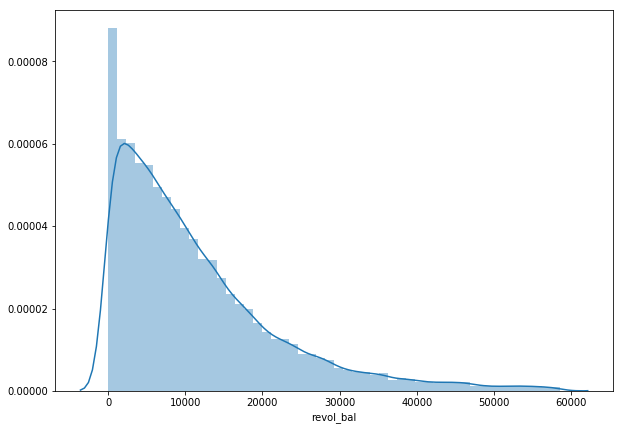

In [225]:
dist_plot_variables(master_loan_dataset_copy, 'revol_bal')

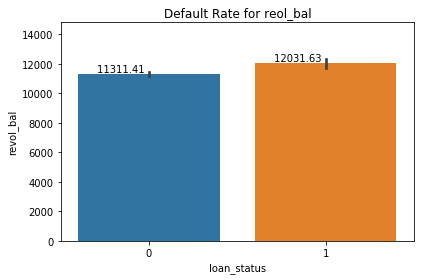

In [226]:
plot_default_rate_for_columns(master_loan_dataset_copy, 'revol_bal', title = 'Default Rate for reol_bal')

In [227]:
master_loan_dataset_copy.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,28972.000,11311.407,10567.107,0.000,3552.750,8382.500,15712.250,58576.000
1,4629.000,12031.634,10993.554,0.000,3991.000,9031.000,16559.000,58280.000


#### Conclusions:
1. There is not much difference in the means of default rate of revol_bal for Charged off an Fully Paid loans.

#### Variable revol_util

In [228]:
master_loan_dataset_copy.revol_util.describe()


count   33601.000
mean       48.822
std        28.196
min         0.000
25%        25.500
50%        49.300
75%        72.200
max        99.900
Name: revol_util, dtype: float64

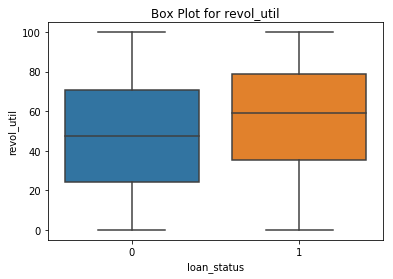

In [229]:
box_plot_variables(master_loan_dataset_copy, 'loan_status', 'revol_util', title = 'Box Plot for revol_util')

#### Conclusions:
1. The median of charged off lies much higher than the Fully Paid.

In [230]:
master_loan_dataset_copy.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,28972.000,47.672,28.113,0.000,24.200,47.750,70.800,99.900
1,4629.000,56.023,27.645,0.000,35.200,59.100,78.900,99.900


#### Conclusions:
1. There is more utilisation of revolving account from Charged Off users than compared to Fully Paid ones.

#### Variable - total_acc

In [231]:
master_loan_dataset_copy.total_acc.value_counts()[:10]

14    1273
15    1272
17    1262
20    1242
16    1240
13    1223
18    1211
21    1198
12    1157
19    1153
Name: total_acc, dtype: int64

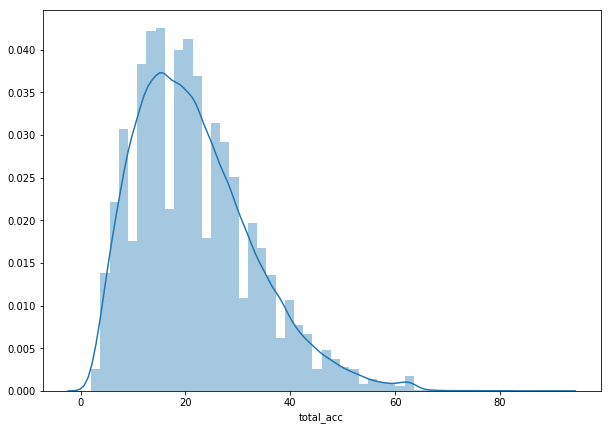

In [232]:
dist_plot_variables(master_loan_dataset_copy, 'total_acc')

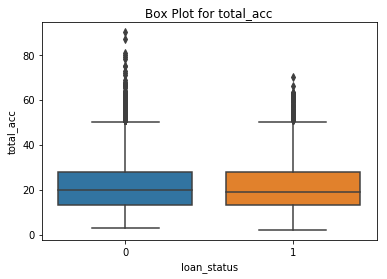

In [233]:
box_plot_variables(master_loan_dataset_copy, 'loan_status', 'total_acc', title = 'Box Plot for total_acc')

#### Conclusions:
1. There is no significant differences in the fully Paid and Charged Off ones.

#### Variable - out_prncp


In [234]:
# Out principal is outstanding principal for amount funded
master_loan_dataset_copy.out_prncp.value_counts()

0.000    33601
Name: out_prncp, dtype: int64

#### Conclusion: We can drop off this column as this one refers for the Current type of loan status which we have discarded already.

In [235]:
master_loan_dataset_copy = master_loan_dataset_copy.drop('out_prncp', axis = 1)

#### Variable - out_prncp_inv



In [236]:
# Out principal is remaining amount funded by investors like before we can remove this column.

master_loan_dataset_copy = master_loan_dataset_copy.drop('out_prncp_inv', axis = 1)

#### Variable - total_payment

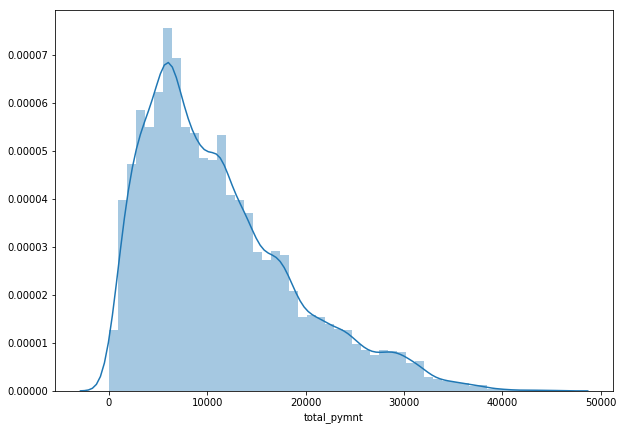

In [237]:
dist_plot_variables(master_loan_dataset_copy, 'total_pymnt')

#### Conclusion: As we can see there are a lot of outliers and our data distribution is rightly skewed..

In [238]:
# Removing outliers as before method of sttdev.
master_loan_dataset_copy = master_loan_dataset_copy[np.abs(master_loan_dataset_copy.total_pymnt-master_loan_dataset_copy.total_pymnt.mean()) <= (3*master_loan_dataset_copy.total_pymnt.std())]


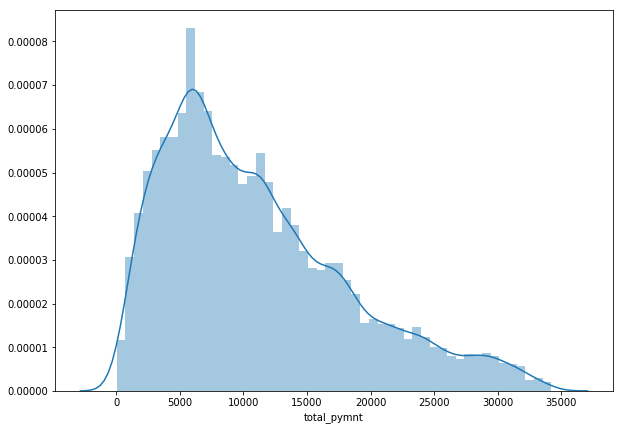

In [239]:
dist_plot_variables(master_loan_dataset_copy, 'total_pymnt')

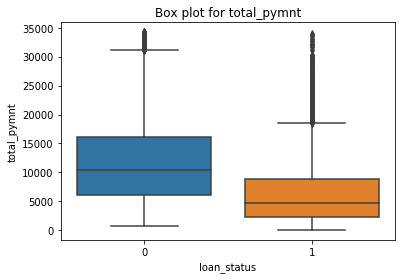

In [240]:
box_plot_variables(master_loan_dataset_copy, 'loan_status', 'total_pymnt', title='Box plot for total_pymnt')

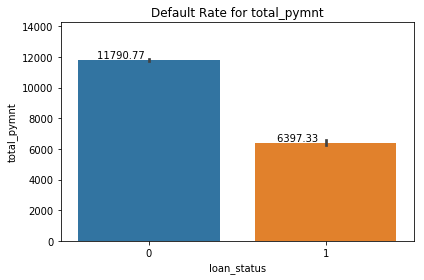

In [241]:
plot_default_rate_for_columns(master_loan_dataset_copy, 'total_pymnt', title = 'Default Rate for total_pymnt')

#### Conclusions:
1. The average rate of Charged Off loans are less than Fully Paid loans.
2. This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [242]:
master_loan_dataset_copy = master_loan_dataset_copy.drop('total_pymnt', axis = 1)

#### Variable - total_pymnt_inv

Interest received to date.

In [243]:
# We can again drop this column as mentioned in previous description.

master_loan_dataset_copy = master_loan_dataset_copy.drop('total_pymnt_inv', axis = 1)

#### Variable - total_rec_late_fee

In [244]:
# We can again drop this column as mentioned in previous description.

master_loan_dataset_copy = master_loan_dataset_copy.drop('total_rec_late_fee', axis = 1)

#### Variable - recoveries

Post loan Charged Off gross recovery

In [245]:
# This variable is not helpful as what we need is at the time of loan funding. 
# Our business objective is to decide at the loan funding time.Therefore this can be discarded.

master_loan_dataset_copy = master_loan_dataset_copy.drop('recoveries', axis = 1)

#### Variable - collection_recovery_fee

post charge off collection fee.

In [246]:
# Again it talks about the post Charged Off fee in which we are not interested. Therefore, this can be dropped off

master_loan_dataset_copy = master_loan_dataset_copy.drop('collection_recovery_fee', axis = 1)

In [247]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'last_pymnt_d_year',
       'last_pymnt_d_month', 'last_credit_pull_d_year',
       'last_credit_pull_d_month', 'loan_bucket_size', 'int_rate_bucket_size',
       'term_int', 'installment_bucket_size', 'income_bin', 'dti_bin'],
      dtype='object')

#### Variable - last_pymnt_d

Last month payment was received.

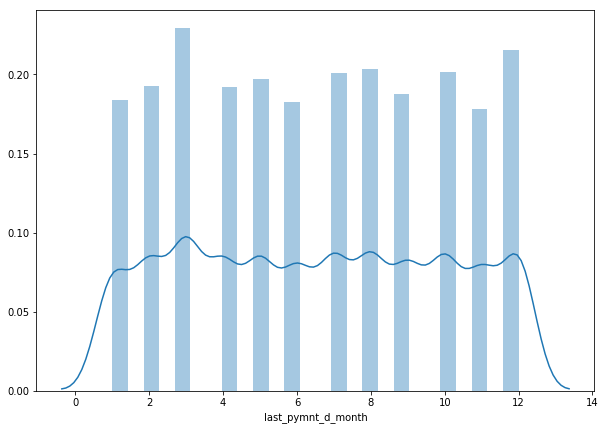

In [248]:
dist_plot_variables(master_loan_dataset_copy, 'last_pymnt_d_month')

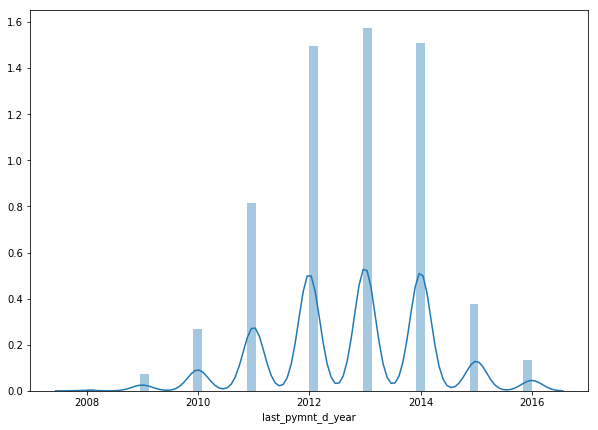

In [249]:
dist_plot_variables(master_loan_dataset_copy, 'last_pymnt_d_year')

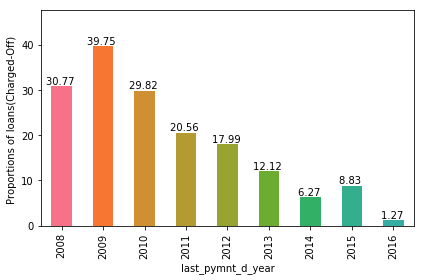

In [250]:
plotLoanStatus(master_loan_dataset_copy, 'last_pymnt_d_year')
plt.show()

#### Conclusions: 
1. The Charged Off loans have been increased in the years 2009-2010
2. This variable can be ignored as it hardly impacts our analysis.

#### Variable - last_pymnt_amnt

Last total payment amount received

In [251]:
master_loan_dataset_copy.last_pymnt_amnt.describe()

count   33336.000
mean     2524.771
std      3930.231
min         0.010
25%       217.778
50%       550.045
75%      3325.875
max     30107.710
Name: last_pymnt_amnt, dtype: float64

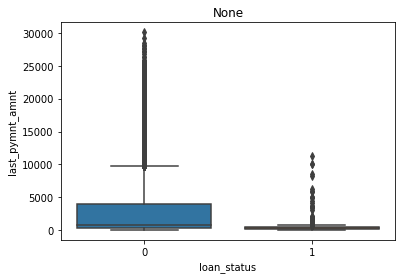

In [252]:
box_plot_variables(master_loan_dataset_copy, 'loan_status', 'last_pymnt_amnt')

#### Conclusions:
1. The average last payment of amounts received for Charged Off loans are relatively lower than Fully Paid ones
2. This is obvious in terms of Charged Off because Charged off are the ones who don't pay back on time.

#### Variable - earliest_cr_line

The month the borrower's earliest reported credit line was opened.

In [253]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'last_pymnt_d_year',
       'last_pymnt_d_month', 'last_credit_pull_d_year',
       'last_credit_pull_d_month', 'loan_bucket_size', 'int_rate_bucket_size',
       'term_int', 'installment_bucket_size', 'income_bin', 'dti_bin'],
      dtype='object')

In [254]:
master_loan_dataset_copy.earliest_cr_line_month.value_counts()

10    3492
12    3408
11    3341
9     3020
1     2900
8     2783
7     2574
6     2460
5     2402
2     2365
3     2322
4     2269
Name: earliest_cr_line_month, dtype: int64

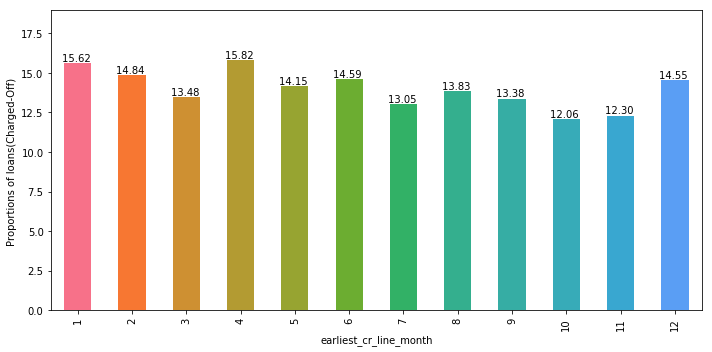

In [255]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan_dataset_copy, 'earliest_cr_line_month')
plt.show()

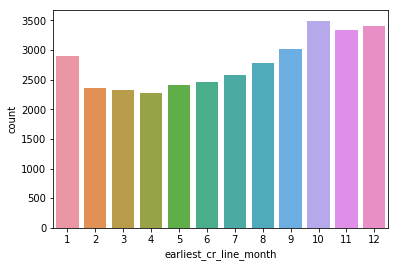

In [256]:
sns.countplot(x = "earliest_cr_line_month", data = master_loan_dataset_copy)
plt.show()

#### Conclusions:
1. Most of the loans were acquired by people in October Month.
2. Most of the Charged Loans were seen in January and April.

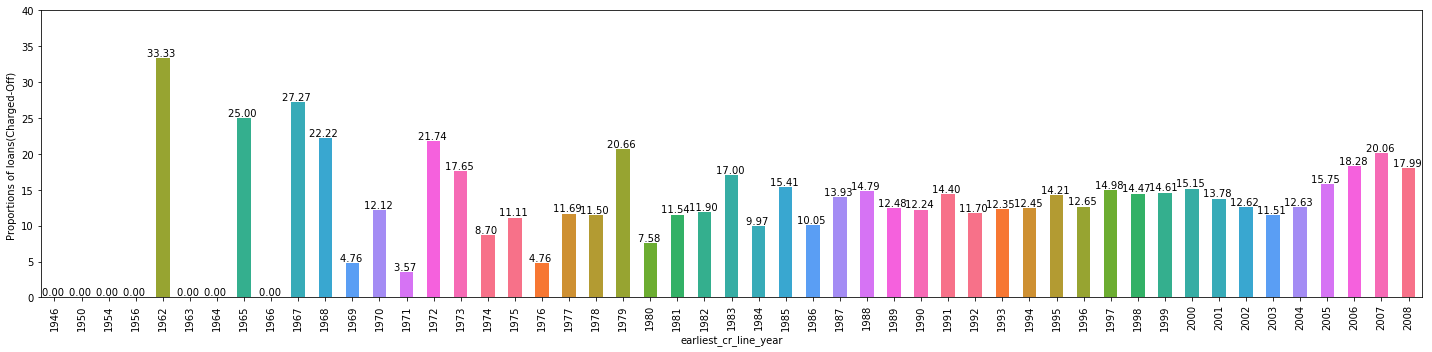

In [257]:
plt.figure(figsize=(20,5))
plotLoanStatus(master_loan_dataset_copy, 'earliest_cr_line_year')
plt.show()

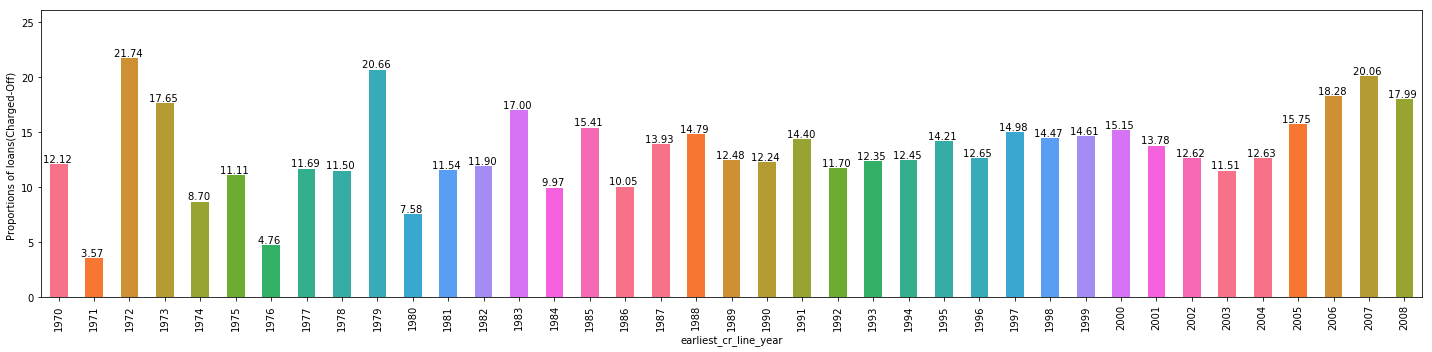

In [258]:
plt.figure(figsize=(20,5))
plotLoanStatus(master_loan_dataset_copy.loc[master_loan_dataset_copy['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

#### Conclusions
1. Newer borrowers are defauling more often.
2. Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of recession, presumably young people, default more often. But this variable can be ignored in our analysis.
3. There is a spike in credit line after years 2005


In [259]:
master_loan_dataset_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'last_pymnt_d_year',
       'last_pymnt_d_month', 'last_credit_pull_d_year',
       'last_credit_pull_d_month', 'loan_bucket_size', 'int_rate_bucket_size',
       'term_int', 'installment_bucket_size', 'income_bin', 'dti_bin'],
      dtype='object')

#### Variable - last_credit_pull_d

The most recent month LC pulled credit for this loan.

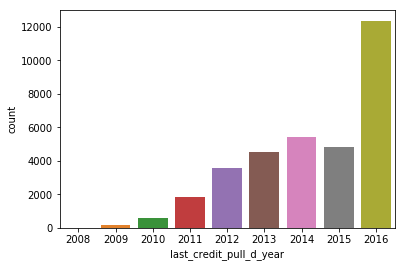

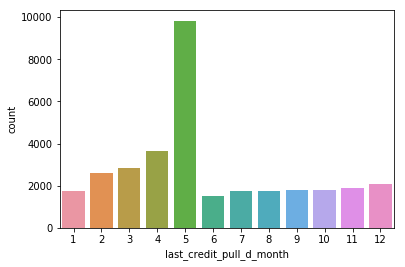

In [260]:

sns.countplot(x = "last_credit_pull_d_year", data = master_loan_dataset_copy)
plt.show()

sns.countplot(x = "last_credit_pull_d_month", data = master_loan_dataset_copy)
plt.show()

#### Conclusions:
1. Most of the credit reports for loans were taken in year 2016.
2. This suggests that Lending club is not taking bad loans for granted.

#### Variable - pub_rec_bankruptcy

Number of public record bankruptcies

In [261]:
master_loan_dataset_copy.pub_rec_bankruptcies.value_counts()

0.000    31908
1.000     1423
2.000        5
Name: pub_rec_bankruptcies, dtype: int64

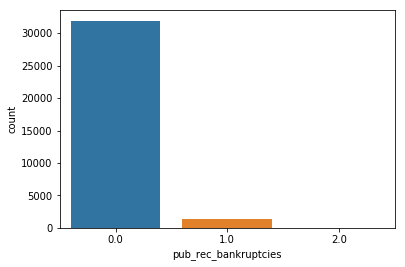

In [262]:

sns.countplot(x = "pub_rec_bankruptcies", data = master_loan_dataset_copy)
plt.show()


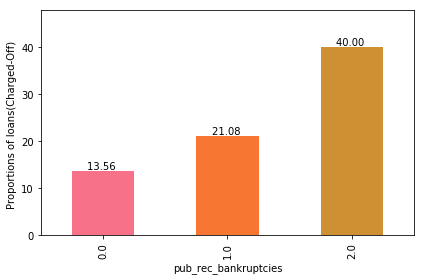

In [263]:
plotLoanStatus(master_loan_dataset_copy, 'pub_rec_bankruptcies')
plt.show()

#### Conclusions:
1. Public bankruptcies can be seen increasing.
2. Bankruptcies in public records are private and not a part of credit report.

#### Bivariate Data Analysis

##### Loan Amount Vs Annual Income 

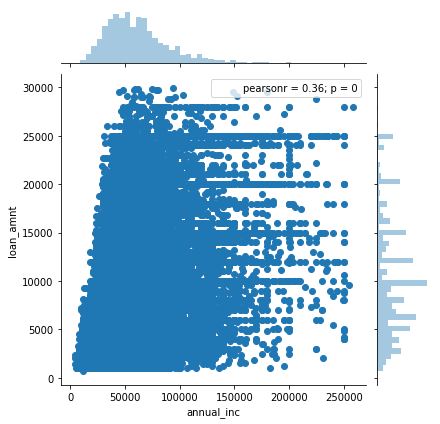

In [264]:
sns.jointplot('annual_inc', 'loan_amnt', master_loan_dataset_copy.loc[master_loan_dataset_copy['annual_inc']<260000])
plt.show()

#### Conclusions:
1. There are people with income less than 50,000 asking for loans of 250000. This can be risky for Lending club and they should avoid doing this or have a more profound background check.

#### loan amount vs grade

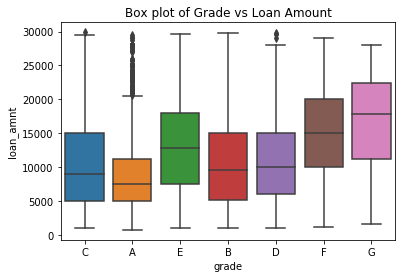

In [265]:
box_plot_variables(master_loan_dataset_copy, x = "grade", y="loan_amnt", title="Box plot of Grade vs Loan Amount")
plt.show()

#### Conclusions:
1. the median loan amount for a grade G loan being significantly higher than that of a grade A, B, or C loan.

#### Annual Income with Grade

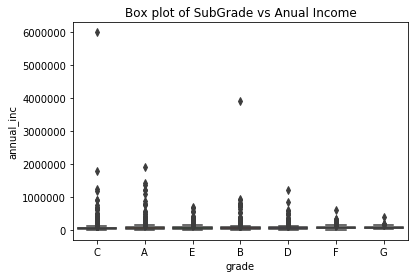

In [266]:
box_plot_variables(master_loan_dataset_copy[master_loan_dataset_copy['annual_inc']<260000], x = "grade", y="annual_inc", title="Box plot of SubGrade vs Anual Income")
plt.show()

#### loan_amnt vs verification_status vs loan status

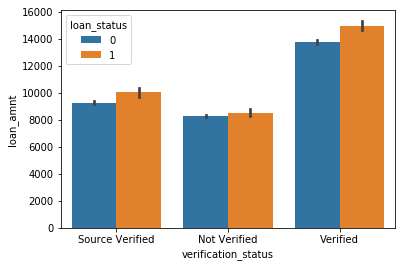

In [267]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_loan_dataset_copy, estimator=np.mean)
plt.show()

#### Conclusions


1. Higher loan amounts are Verified more often.
2. Larger loans are less in number, but has a higher charge off rate.
3. Higher loan amounts are riskier and are also verified more often by Lending Club.

#### Interest Rate and Sub grade

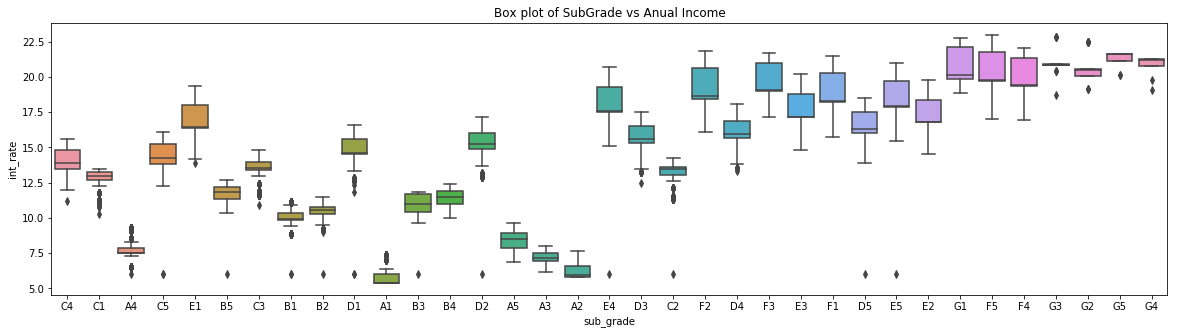

In [268]:
plt.figure(figsize=(20,5))
box_plot_variables(master_loan_dataset_copy, x = "sub_grade", y="int_rate", title="Box plot of SubGrade vs Anual Income")
plt.show()

#### Conclusions:
1. Larger the sub grade, higher are the rate of interest for the loan. Directly propotional

#### Loan amount vs Grade vs Term

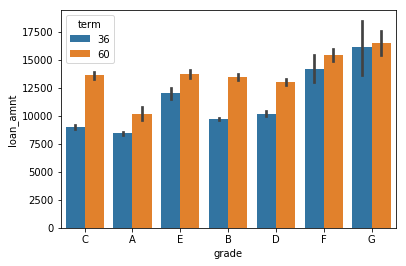

In [269]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master_loan_dataset_copy, estimator=np.mean)
plt.show()

#### Conclusions:
1. Larger the loan amount, larger is the term plan for lower grade, for example Grade G

#### Loan amount vs term vs loan status

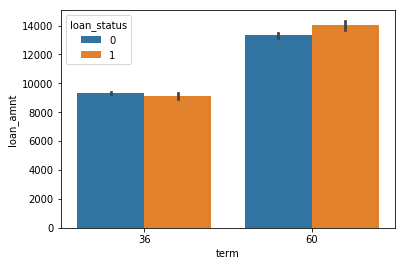

In [270]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=master_loan_dataset_copy, estimator=np.mean)
plt.show()

#### Conclusions:
1. Larger loan amounts are directly proportional to the longer terms and therefore are more charged off.

#### revol_util Vs grade Vs Loan Status

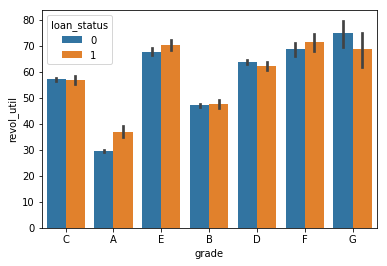

In [271]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=master_loan_dataset_copy, estimator=np.mean)
plt.show()

#### Conclusions:
1. The revol_util is positively correlated to the grade i.e as the grade increases revol util increases.


#### Loan amount Vs addr_state vs loan Status

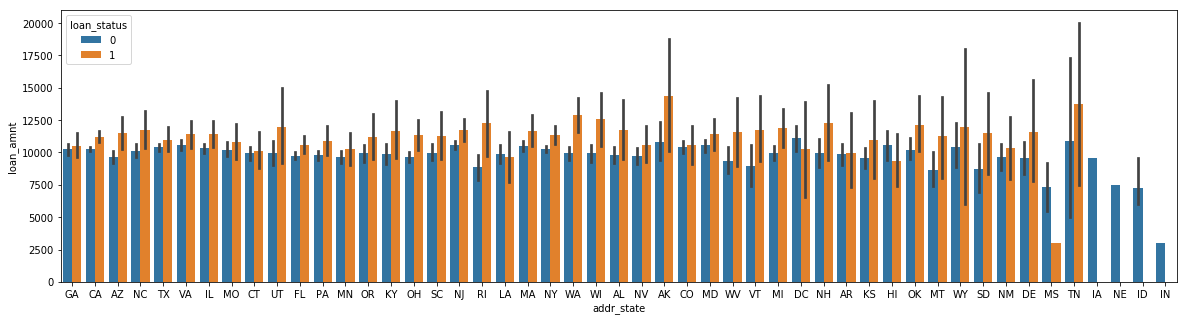

In [272]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=master_loan_dataset_copy, estimator=np.mean)
plt.show()

#### Conclusions:
1. States AK: Alaska has the the highest average loan amount that was charged off.

#### revol_rate Vs Grade

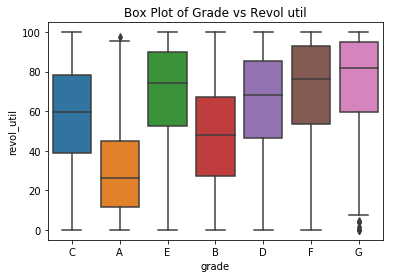

In [273]:
box_plot_variables(master_loan_dataset_copy, 'grade', 'revol_util', title = 'Box Plot of Grade vs Revol util')

#### Conclusions:
1. With increase of grade, revol util increases.

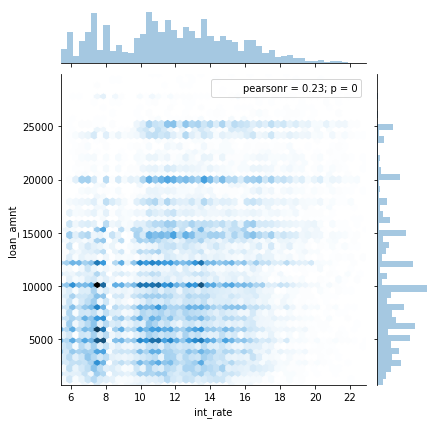

In [274]:
sns.jointplot('int_rate', 'loan_amnt', master_loan_dataset_copy, kind="hex")
plt.show()

#### Conclusions:
1. A very small correlation is there between loan amnt and interest rate.



#### dti vs open acc

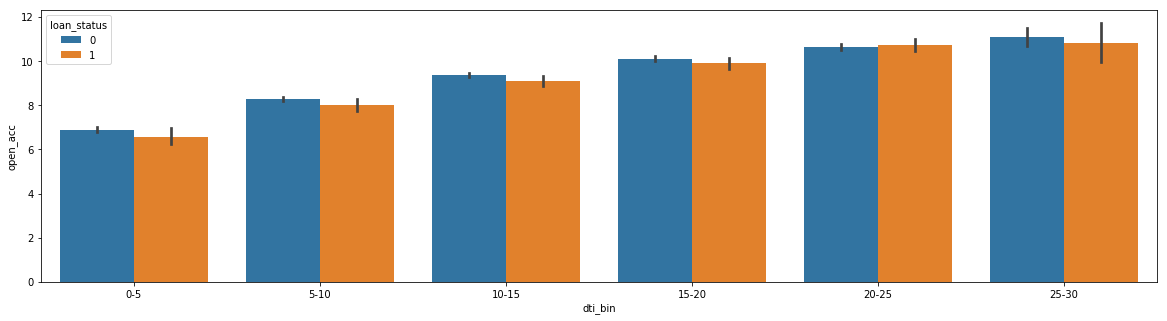

In [276]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=master_loan_dataset_copy, estimator=np.mean)
plt.show()

Note: Dti bin was created in univariate analysis

#### Conclusions:
1. dti increses with the number of open credit line in borrowers credit file.

#### delinq_2yr VS int_rate VS loan_status

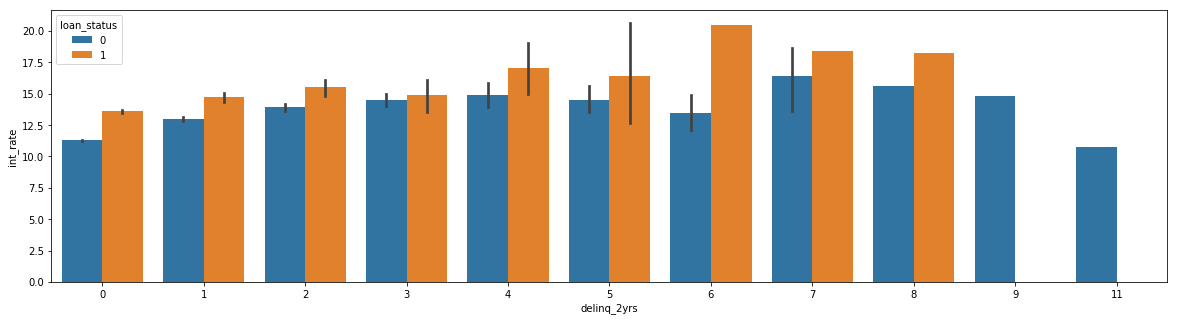

In [277]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=master_loan_dataset_copy, estimator=np.mean)
plt.show()

#### Conclusions:
1. When the deliquency increases, the interest rate also increases and results in more Charged Off.

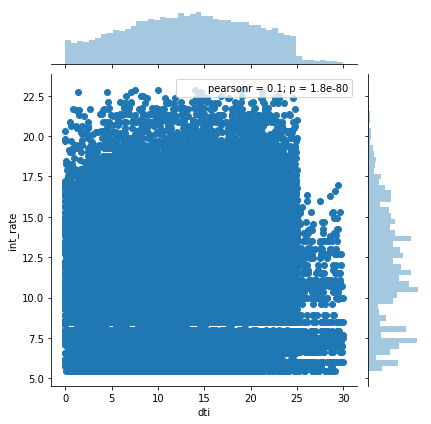

In [279]:
sns.jointplot('dti', 'int_rate', master_loan_dataset_copy)
plt.show()


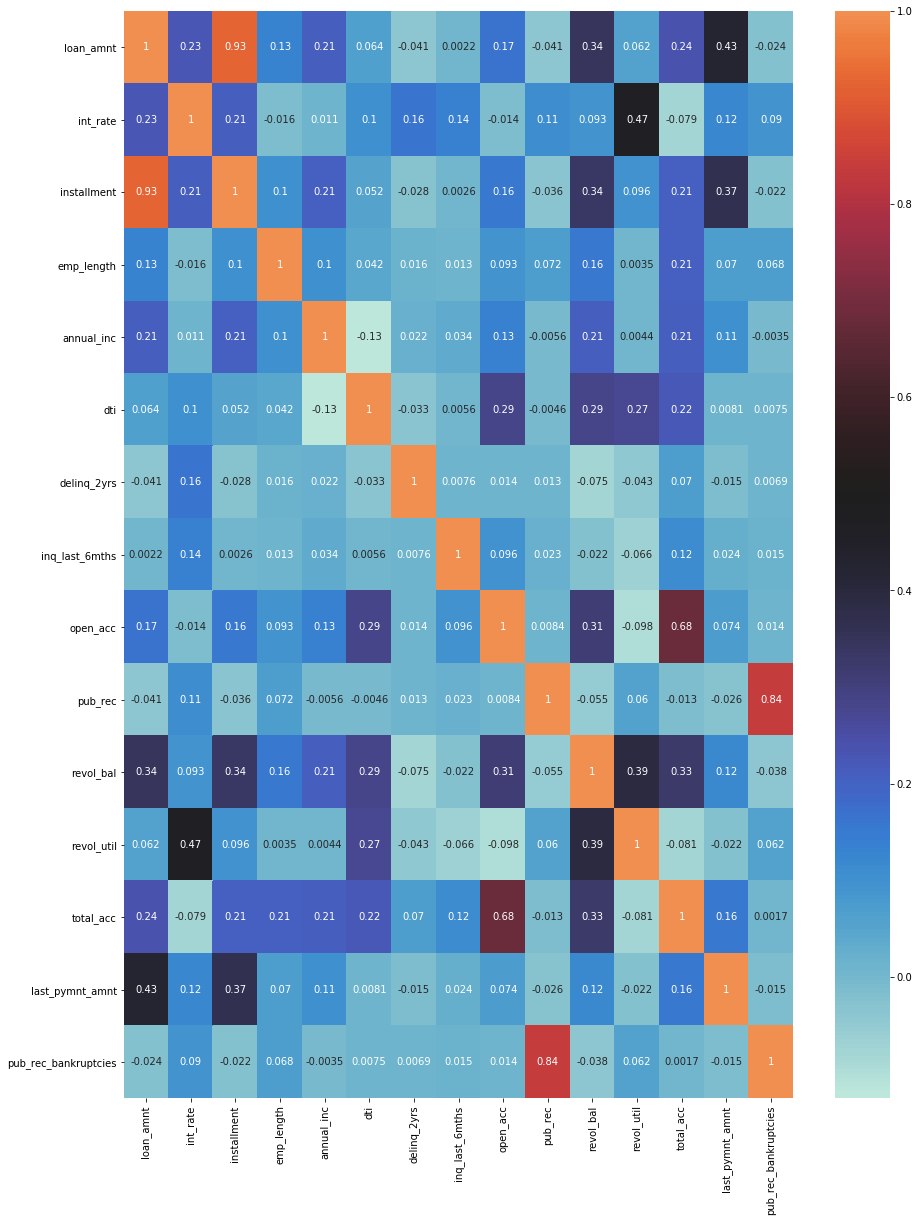

In [280]:
plt.figure(figsize=(15,20))
cont_vars = ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master_loan_dataset_copy[cont_vars].corr()
sns.heatmap(corr, annot=True, center=0.5)

#### Conclusions:
1. loan_amnt is correlated to last_payment_amount with coefficient 0.44
2. int_rate is correlated to revol_util with 0.47.
3. delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value.


#### loan_amnt vs home_ownership

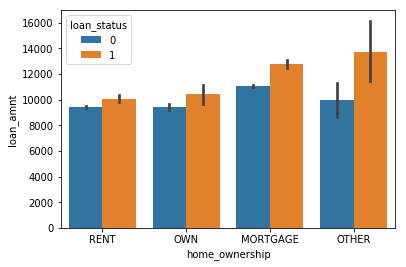

In [285]:
sns.barplot(x="home_ownership", y="loan_amnt",data=master_loan_dataset_copy, hue = "loan_status")
plt.show()

#### Conclusions:
1. The loan amount seems to be higher for the 'Other' type of home ownership. This is high at risk of getting defaulted.

#### Final Conclusion
Detailed analysis from the heatmap shows that variables grade, sub_grade, home_owership, revol_util and dti are some of the strong indicators of loan default of borrowers. Applicants living in rented or mortgaged home with high revolving amount utilization, high debt to income ratio and low LC grade (> G2) holds high risk of defaulting the loan. Hence these variables can be used while scrutinizing new loan applications to filter out possible defaulters.